In [448]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, clone
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [288]:
df1=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Assignment 1\\train.CSV")


C:\Users\User\AppData\Local\Temp\ipykernel_8212\3981901577.py:1: DtypeWarning: Columns (494,597,599,600,601,603,604) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Assignment 1\\train.CSV")


In [289]:
df1.shape

(1387, 806)

# Data Preprocessing and Impute missing values

In [290]:
df1.isnull().sum()

ID                                                0
Year                                              0
Month                                             0
Hospital                                          0
Sample                                            0
                                               ... 
FU_L.interrogansserovarAustralisstr.Ballico    1265
FU_L.interrogansserovarwolfiistr.3705          1265
FU_L.interrogansserovarWeerasinghe             1265
FU_Patoc                                       1265
Final                                             0
Length: 806, dtype: int64

In [291]:
df1.drop(columns=['ID'], inplace=True)

In [292]:
numerical_cols = df1.select_dtypes(include=['float64', 'int64']).columns
n=list(numerical_cols)
categorical_cols = df1.select_dtypes(include=['object']).columns
c=list(categorical_cols)
len(c)

11

In [293]:
df1.replace(['99', 99], np.nan, inplace=True)

In [294]:
# symptoms varibles ends with 2 to 10(variable name) combine as a count meaninfully as a count of days that particular symptoms last
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
df1.rename(columns = col_names, inplace=True)

colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = df1[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  df1[col+'Days'] = df['Days']
  df1.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [295]:
# Psychoticsymptoms varibles ends with 2 to 10(variable name) combine as a count meaninfully as a count of days that particular symptoms last
col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
df1.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = df1[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  df1[col+'Days'] = df['Days']
  df1.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [296]:
# combine three variables denoting wheter a water resoures within close range to home and workplace as a one variable 'anyWaterArea'

cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = df1[cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

df1['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

df1.drop(cols, axis = 1, inplace = True)


In [297]:
df1.shape

(1387, 527)

In [298]:
missing_percentage = df1.isna().mean() * 100

# Determine columns to drop based on the threshold
columns_to_drop_1 = missing_percentage[missing_percentage > 80].index

# Drop columns with more than 50% missing values
df1 = df1.drop(columns_to_drop_1, axis=1)

In [299]:
df1.shape

(1387, 192)

In [300]:
df1['Income'].isnull().sum()

536

In [301]:
# convert qualitative variables as 'category'
col_category = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1','Final']

df1[col_category] = df1[col_category].astype('category')

In [302]:
# columns having null values
len(df1.columns[df1.isna().any()])
x_train= df1.copy()
x_train.shape

(1387, 192)

In [303]:
median_value=x_train['Income'].median()
x_train['Income'].fillna(median_value, inplace=True)
x_train['Income'].isnull().sum()


0

In [304]:
median_value=x_train['Age'].mean()
x_train['Age'].fillna(median_value, inplace=True)
x_train['Age'].isnull().sum()


0

In [305]:
median_value=x_train['WBCcount'].mean()
x_train['WBCcount'].fillna(median_value, inplace=True)
x_train['WBCcount'].isnull().sum()


0

In [306]:
x_train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 192 columns):
 #    Column                                               Dtype   
---   ------                                               -----   
 0    Year                                                 category
 1    Month                                                category
 2    Hospital                                             category
 3    Sample                                               category
 4    ICU                                                  category
 5    OPD                                                  category
 6    Sex                                                  category
 7    Age                                                  float64 
 8    Ethnicity                                            category
 9    Income                                               float64 
 10   Education                                            category
 11   Te

In [307]:
x_train = x_train.fillna(x_train.mode().iloc[0])

In [308]:
print(x_train.columns[x_train.isna().any()])

Index([], dtype='object')


In [309]:
x_train.isnull().sum()

Year                   0
Month                  0
Hospital               0
Sample                 0
ICU                    0
                      ..
hepatomegalyDays       0
SpleenomegalyDays      0
LymphadenopathyDays    0
NeckstiffnessDays      0
anyWaterArea           0
Length: 192, dtype: int64

# Part (a)

## Descriptive Analysis

In [310]:
# 5-number summary statistics
x_train.describe()

,Age,Income,Usualdrinkingwatersource,Usualbathingwatersource,Sourceofwaterforhousehold,Garbagedisposalprocedure,Accumilationofrefusal,Availabilityofpublicgarbagecollectionprocedure,Homemarshywetland,Workplacemarshywet,...,HaemoptysisDays,SOBDays,ChestpainDays,BleedingDays,hepatictenderDays,hepatomegalyDays,SpleenomegalyDays,LymphadenopathyDays,NeckstiffnessDays,anyWaterArea
count,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,...,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000,1387.000000
mean,42.955629,34995.673396,6.891853,2.491709,3.679885,2.150685,1.952415,1.968277,1.940880,1.946647,...,0.057678,0.751262,0.812545,0.450613,1.028839,0.220620,0.051190,0.281903,0.950973,1.080029
std,13.926202,20422.397270,2.221465,1.318821,0.977329,0.838085,0.212963,0.175325,0.235935,0.224817,...,0.613335,2.275281,2.296126,1.641227,2.472482,1.127029,0.544794,1.367732,2.387538,0.271436
min,2.000000,3000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,34.000000,30000.000000,8.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,42.955629,30000.000000,8.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,53.000000,40000.000000,8.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,87.000000,350000.000000,8.000000,8.000000,8.000000,7.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [227]:
x_train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 192 columns):
 #    Column                                               Dtype   
---   ------                                               -----   
 0    Year                                                 category
 1    Month                                                category
 2    Hospital                                             category
 3    Sample                                               category
 4    ICU                                                  category
 5    OPD                                                  category
 6    Sex                                                  category
 7    Age                                                  float64 
 8    Ethnicity                                            category
 9    Income                                               float64 
 10   Education                                            category
 11   Te

In [228]:
# check the correlation coefficient to ensure that L2 and L1 standardization improve the fitted model accuracy
# since response variable is a binary variable we used Point-Biserial correlation
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr


In [165]:
quantitative_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Calculate the Pearson correlation matrix for the quantitative variables
correlation_matrix = x_train[quantitative_columns].corr()

# Calculate Point-Biserial correlation between each quantitative variable and the binary 'Final' variable
pointbiserial_correlations = []
for col in quantitative_columns:
    r, _ = pointbiserialr(x_train['Final'], x_train[col])
    pointbiserial_correlations.append(r)

# Convert point-biserial correlations to a DataFrame
pointbiserial_df = pd.DataFrame(pointbiserial_correlations, index=quantitative_columns, columns=['Final'])

# Combine the Pearson and Point-Biserial correlations into one DataFrame
#correlation_matrix = correlation_matrix.assign(Final=pointbiserial_df['Final']).transpose().assign(Final=pointbiserial_df['Final'])


# Calculate the correlation matrix for the quantitative variables
correlation_matrix = x_train[quantitative_columns].corr()



In [229]:
correlation_matrix = x_train[quantitative_columns].corr()
correlation_matrix

,Age,Income,Usualdrinkingwatersource,Usualbathingwatersource,Sourceofwaterforhousehold,Garbagedisposalprocedure,Accumilationofrefusal,Availabilityofpublicgarbagecollectionprocedure,Homemarshywetland,Workplacemarshywet,...,HaemoptysisDays,SOBDays,ChestpainDays,BleedingDays,hepatictenderDays,hepatomegalyDays,SpleenomegalyDays,LymphadenopathyDays,NeckstiffnessDays,anyWaterArea
Age,1.000000,-0.069026,0.013014,0.043882,0.063520,-0.069682,-0.015785,0.021921,-0.009992,-0.006738,...,-0.026731,0.060643,0.072787,0.040177,0.043230,-0.001398,-0.026328,-0.025177,0.052475,-0.014156
Income,-0.069026,1.000000,0.111266,-0.103565,0.003292,0.054249,0.039435,-0.078424,0.085149,0.053222,...,0.050709,0.091790,0.062913,0.087044,0.103154,-0.002121,-0.001407,0.033791,0.129035,-0.009439
Usualdrinkingwatersource,0.013014,0.111266,1.000000,-0.291890,0.534365,-0.171831,0.266680,0.156056,0.338823,0.280262,...,0.017820,0.073041,0.084429,0.109156,0.109729,-0.060779,0.005770,0.084367,0.137754,-0.392463
Usualbathingwatersource,0.043882,-0.103565,-0.291890,1.000000,0.098698,-0.009640,-0.235176,-0.041703,-0.303017,-0.312975,...,-0.009220,-0.059717,-0.051978,-0.085107,-0.082017,0.069190,0.006114,-0.068102,-0.084911,0.091545
Sourceofwaterforhousehold,0.063520,0.003292,0.534365,0.098698,1.000000,-0.211491,0.082754,0.239650,0.105605,0.138939,...,0.032028,0.074483,0.091879,0.082797,0.080857,-0.032126,0.025378,0.046508,0.099326,-0.303163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hepatomegalyDays,-0.001398,-0.002121,-0.060779,0.069190,-0.032126,-0.005431,-0.067453,0.035445,-0.086581,-0.021853,...,0.117268,0.072342,0.094896,0.067134,0.309198,1.000000,0.382297,0.136550,0.026546,0.010640
SpleenomegalyDays,-0.026328,-0.001407,0.005770,0.006114,0.025378,-0.010585,0.008573,0.017014,-0.043797,0.022315,...,0.265384,-0.008347,0.042283,0.012916,0.095854,0.382297,1.000000,0.050336,0.008587,-0.027723
LymphadenopathyDays,-0.025177,0.033791,0.084367,-0.068102,0.046508,-0.021978,0.031225,0.016259,0.031561,0.020791,...,0.003825,0.187392,0.246121,0.129791,0.277089,0.136550,0.050336,1.000000,0.347364,-0.041378
NeckstiffnessDays,0.052475,0.129035,0.137754,-0.084911,0.099326,-0.060488,0.055007,0.046267,0.052488,0.024695,...,0.102937,0.275207,0.407105,0.272626,0.427898,0.026546,0.008587,0.347364,1.000000,-0.084120


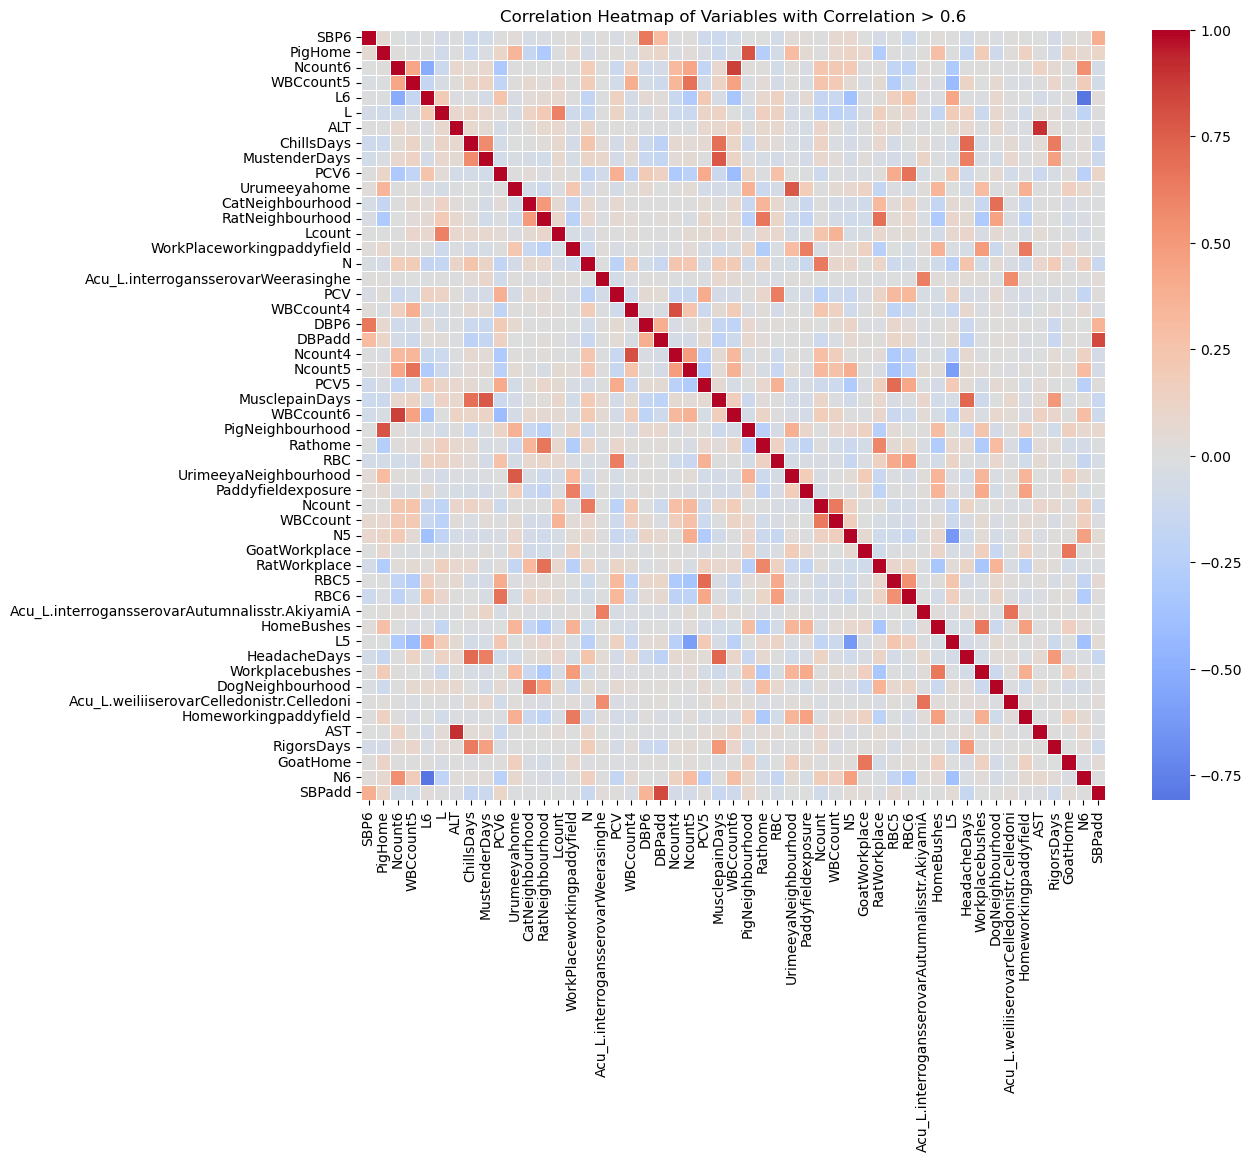

In [230]:
quantitative_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the quantitative variables
correlation_matrix = x_train[quantitative_columns].corr()

# Filter the correlation matrix to keep only correlations above 0.6 or below -0.6
# Exclude self-correlations (diagonal elements)
high_corr_matrix = correlation_matrix[(correlation_matrix.abs() > 0.6) & (correlation_matrix != 1)]

# Extract the indices of the high correlations
high_corr_vars = high_corr_matrix.stack().index.tolist()

# Create a set of the variable names involved in high correlations
high_corr_var_set = set([var for tup in high_corr_vars for var in tup])

# Convert the set to a list
high_corr_var_list = list(high_corr_var_set)

# Create a subset correlation matrix with these variables
filtered_corr_matrix = correlation_matrix.loc[high_corr_var_list, high_corr_var_list]

# Plot the heatmap without annotations
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Heatmap of Variables with Correlation > 0.6')
plt.show()

### According to this correlation heatmap we can clearly see there're high correlations between some variables which indicate that multicollinearity in these variables to overcome the effect we can use Laso and Ridge regularization techniques when fit the models.

## Chi-Square test


In [231]:
# Chi-Square test assesses whether there is a significant association between two categorical variables

y=x_train['Final']
def ChiSquareContingency(data, y):
    p_value = chi2_contingency(pd.crosstab(data, y))[1]
    print(f'p-value: {p_value}')
    if p_value > 0.05:
        print(f'Accept H0, feature {data.name} is independent with Final status')
    else:
        print(f'Reject H0, feature {data.name} is dependent with Final status')


for column in data:
    ChiSquareContingency(x_train[column], y)
    print('')

p-value: 1.7734562115171273e-09
Reject H0, feature Year is dependent with Final status

p-value: 1.2569407635832314e-17
Reject H0, feature Month is dependent with Final status

p-value: 2.999038928429926e-06
Reject H0, feature Hospital is dependent with Final status

p-value: 0.1116342130270949
Accept H0, feature Sample is independent with Final status

p-value: 0.7535515988308894
Accept H0, feature ICU is independent with Final status

p-value: 0.012866294180286194
Reject H0, feature OPD is dependent with Final status

p-value: 0.020408698861285997
Reject H0, feature Sex is dependent with Final status

p-value: 0.147898537269516
Accept H0, feature Ethnicity is independent with Final status

p-value: 0.028776007246949946
Reject H0, feature Education is dependent with Final status

p-value: 0.29290684354855323
Accept H0, feature TertiaryEducation is independent with Final status

p-value: 0.048400758283433966
Reject H0, feature Prophylactics is dependent with Final status

p-value: 0.71

### Under 95% significance level, we can state that the categorical variables: WPqPCRDiagnosis,Possibleexposure,Pastantibiotics,Prophylactics,Education,Month, Isolate and Year have significant relationship bwtween the Final variable since the corresponding p-value of the chi-square test realted to the mentioned variables is less than or equals to 0.5. So we can identified these varaibles as the significant variables but for the further confirmation we go with the univariate and bivariate plots 

## Point-Biserial correlation

In [173]:
import scipy.stats as stats

for column in quantitative_columns:
    correlation, p_value = stats.pointbiserialr(y, x_train[column])
    print(f"Point Biserial Correlation for column '{column}': {correlation}")
    print(f"P-value: {p_value}")
    print('')

Point Biserial Correlation for column 'Age': -0.05808815069429123
P-value: 0.030524168508596277

Point Biserial Correlation for column 'Income': -0.059140836896811495
P-value: 0.027630591772243435

Point Biserial Correlation for column 'Usualdrinkingwatersource': -0.01010097814380875
P-value: 0.7070242637854341

Point Biserial Correlation for column 'Usualbathingwatersource': -0.04800653297712612
P-value: 0.07388910798567935

Point Biserial Correlation for column 'Sourceofwaterforhousehold': -0.03596626424748526
P-value: 0.1806692662128599

Point Biserial Correlation for column 'Garbagedisposalprocedure': 0.003958426822619245
P-value: 0.8829037799388076

Point Biserial Correlation for column 'Accumilationofrefusal': -0.00605573899466392
P-value: 0.8217231248856733

Point Biserial Correlation for column 'Availabilityofpublicgarbagecollectionprocedure': -0.03113109169921603
P-value: 0.24660556848631549

Point Biserial Correlation for column 'Homemarshywetland': -0.0138783916308123
P-valu

### Here we used point-biserial correlation to measure the correlation between the quantitative variables and the "Final" variable. So under 95% confidence level we can state that ConfusionDays,ChestpainDays,hepatictenderDays,LymphadenopathyDays,NeckstiffnessDays,JaundiceDays,MusclepainDays,RigorsDays, FeverDays and,HeadacheDays can beconsidered as significant factors that affect in determining the Final variable 

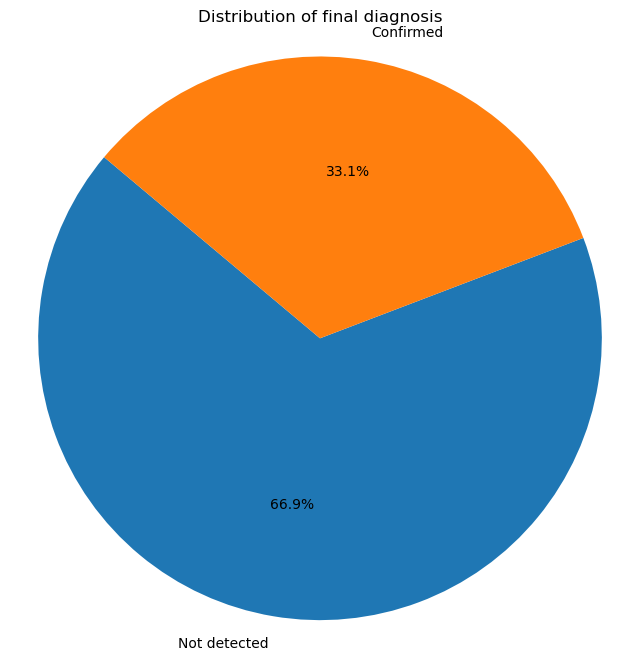


Percent share for each category:
Final
2    66.906994
1    33.093006
Name: proportion, dtype: float64


In [232]:
counts = y.value_counts(normalize=True) * 100

# Mapping of labels
label_mapping = {1: 'Confirmed', 2: 'Not detected'}

# Generate the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=[label_mapping[label] for label in counts.index], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of final diagnosis')
plt.show()

print("\nPercent share for each category:")
print(counts)

### we can see the data are imbalnce so to address the class imbalance we use SMOTE to prevent overfitting when we fit models.According to the distribution of status of leptospirosis, majority of patients, comprising 66.9% represent not detected. In contrast, confirmed patients accounting for 33.09% of total.


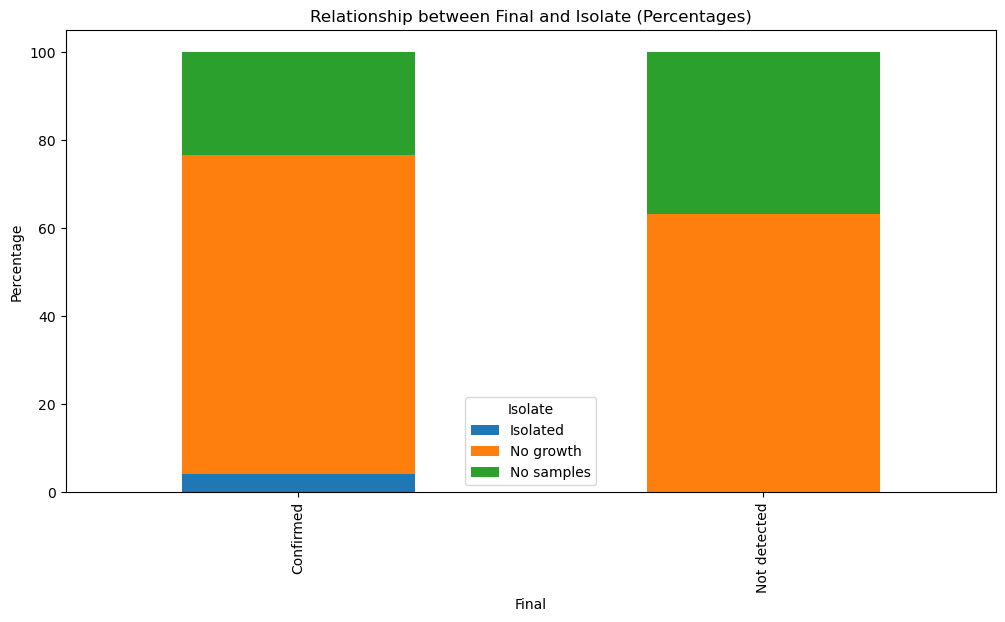

In [234]:
combined_df = pd.concat([x_train[['Isolate']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})

# Replace numerical categories with descriptive labels for 'Isolate' variable
combined_df['Isolate'] = combined_df['Isolate'].replace({1: 'Isolated', 2: 'No growth', 98: 'No samples'})

# Create a crosstab to get the counts for each combination of 'Final' and 'Isolate'
crosstab = pd.crosstab(combined_df['Final'], combined_df['Isolate'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and Isolate (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='Isolate')
plt.show()

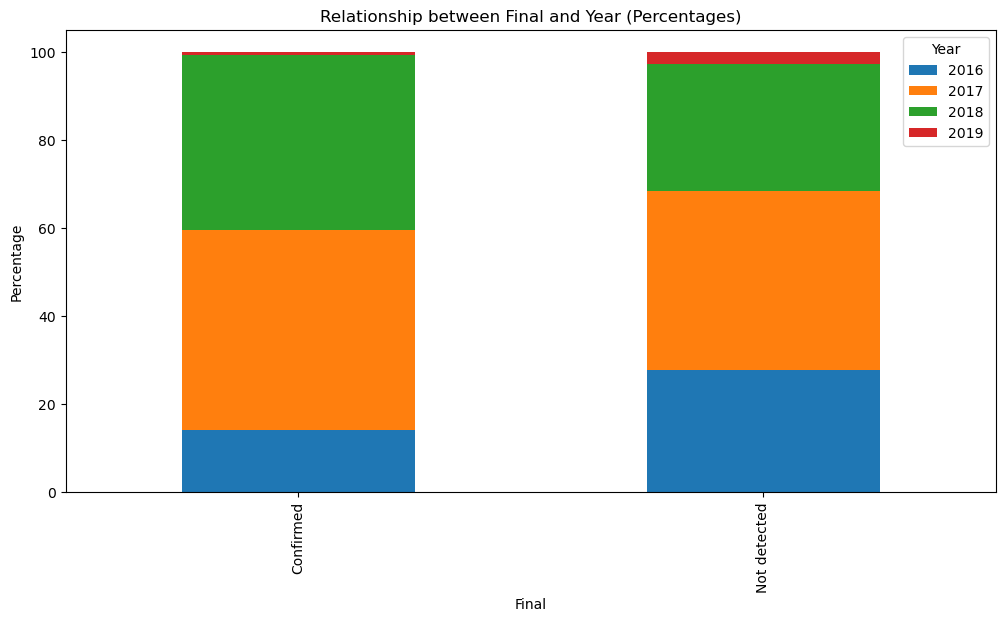

In [474]:
combined_df = pd.concat([x_train[['Year']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})


# Create a crosstab to get the counts for each combination of 'Final' and 'Year'
crosstab = pd.crosstab(combined_df['Final'], combined_df['Year'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and Year (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='Year')
plt.show()

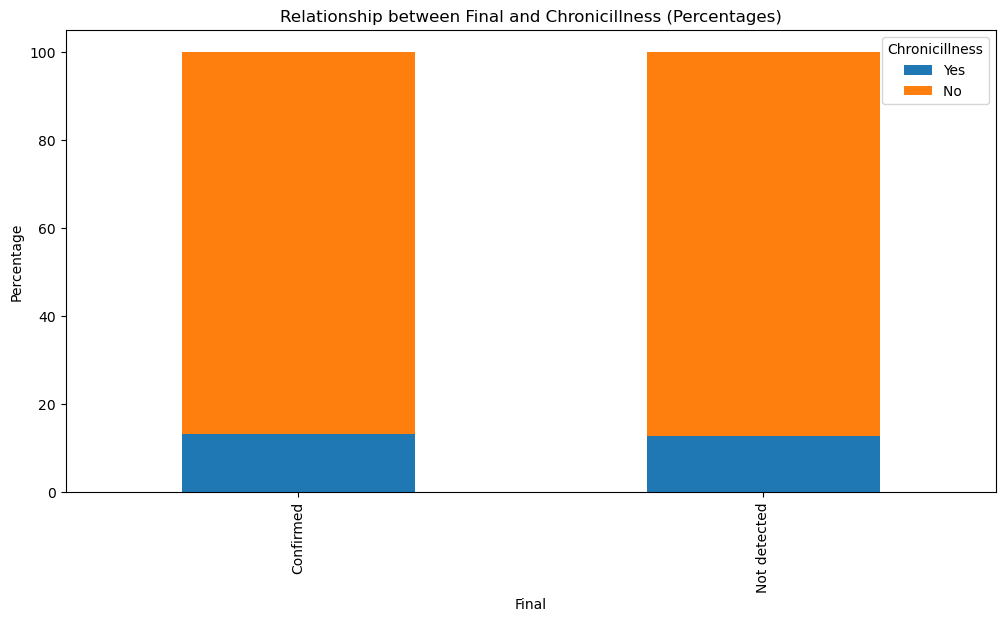

In [312]:
# Chronicillness
combined_df = pd.concat([x_train[['Chronicillness']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})

# Replace numerical categories with descriptive labels for 'Isolate' variable
combined_df['Chronicillness'] = combined_df['Chronicillness'].replace({1: 'Yes', 2: 'No '})

# Create a crosstab to get the counts for each combination of 'Final' and 'Isolate'
crosstab = pd.crosstab(combined_df['Final'], combined_df['Chronicillness'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and Chronicillness (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='Chronicillness')
plt.show()

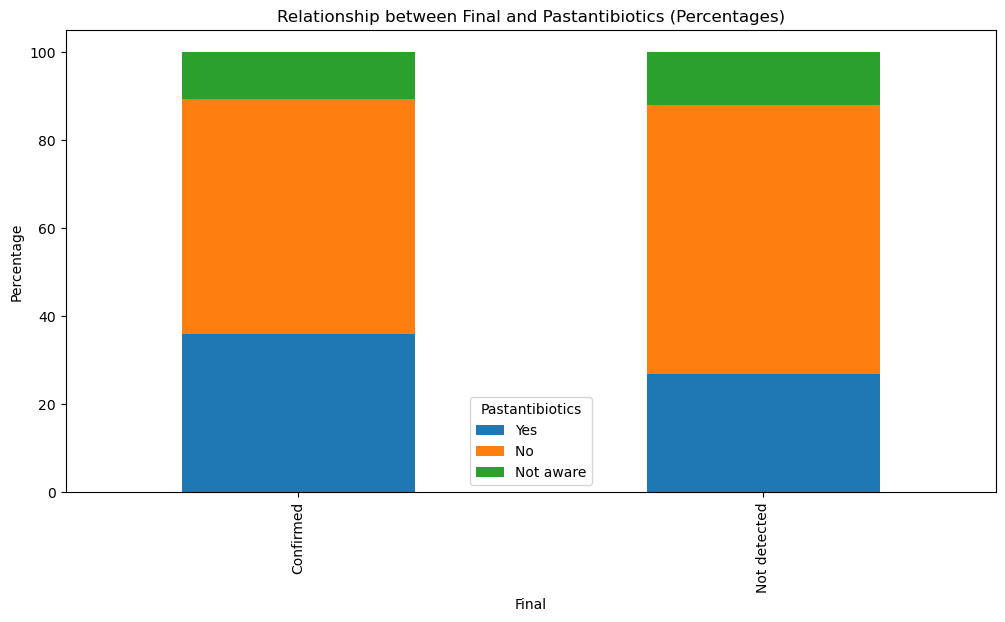

In [314]:
# Pastantibiotics
combined_df = pd.concat([x_train[['Pastantibiotics']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})

# Replace numerical categories with descriptive labels for 'Isolate' variable
combined_df['Pastantibiotics'] = combined_df['Pastantibiotics'].replace({1: 'Yes', 2: 'No ', 3: 'Not aware'})

# Create a crosstab to get the counts for each combination of 'Final' and 'Isolate'
crosstab = pd.crosstab(combined_df['Final'], combined_df['Pastantibiotics'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and Pastantibiotics (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='Pastantibiotics')
plt.show()

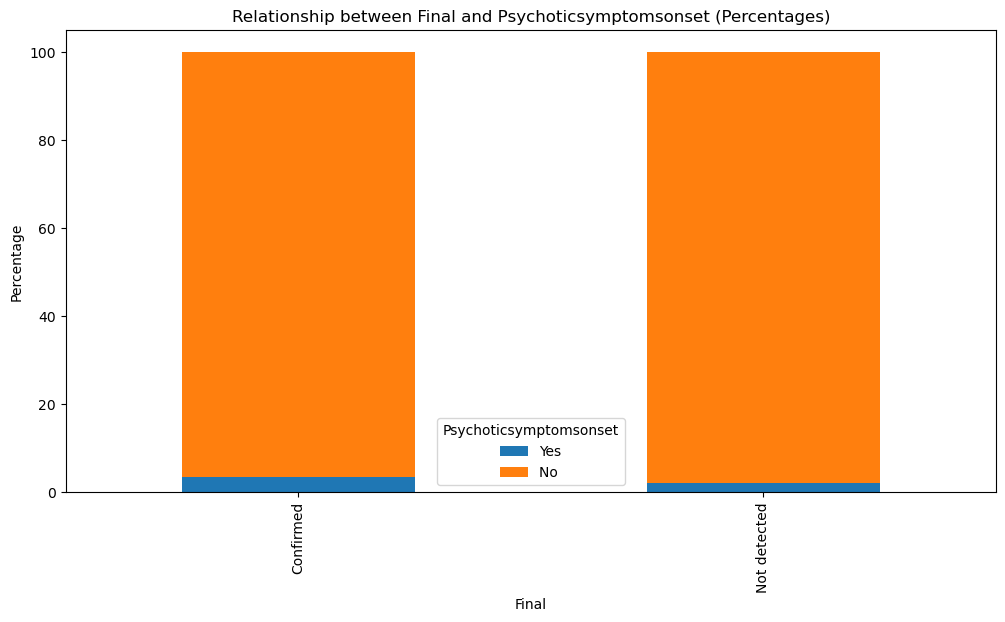

In [315]:
# Psychoticsymptomsonset
combined_df = pd.concat([x_train[['Psychoticsymptomsonset']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})

# Replace numerical categories with descriptive labels for 'Isolate' variable
combined_df['Psychoticsymptomsonset'] = combined_df['Psychoticsymptomsonset'].replace({1: 'Yes', 2: 'No '})

# Create a crosstab to get the counts for each combination of 'Final' and 'Isolate'
crosstab = pd.crosstab(combined_df['Final'], combined_df['Psychoticsymptomsonset'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and Psychoticsymptomsonset (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='Psychoticsymptomsonset')
plt.show()

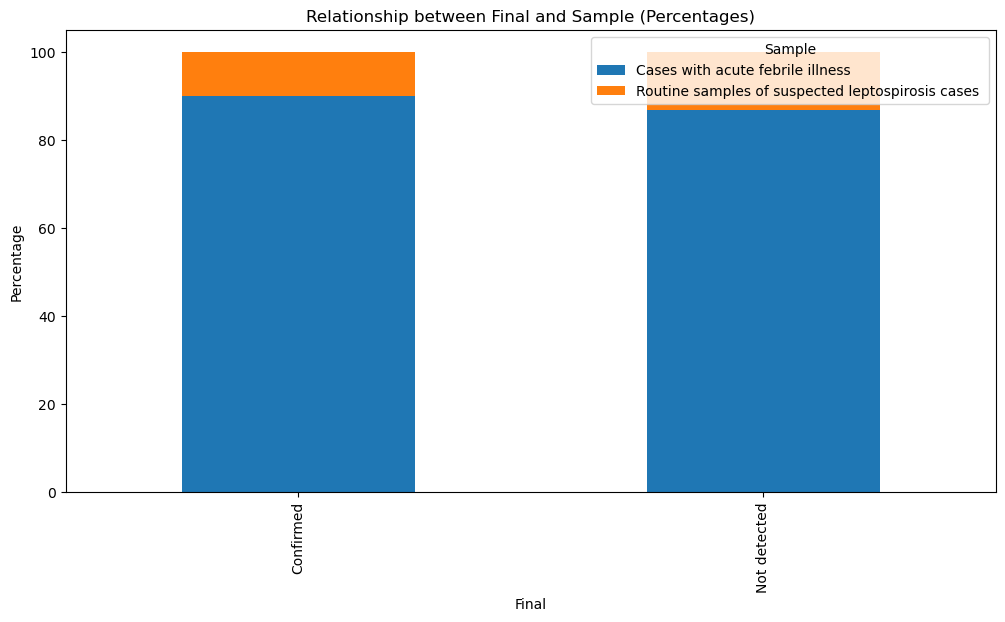

In [317]:
# Sample
combined_df = pd.concat([x_train[['Sample']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})

# Replace numerical categories with descriptive labels for 'Isolate' variable
combined_df['Sample'] = combined_df['Sample'].replace({1: 'Cases with acute febrile illness', 2: 'Routine samples of suspected leptospirosis cases '})

# Create a crosstab to get the counts for each combination of 'Final' and 'Isolate'
crosstab = pd.crosstab(combined_df['Final'], combined_df['Sample'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and Sample (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='Sample')
plt.show()

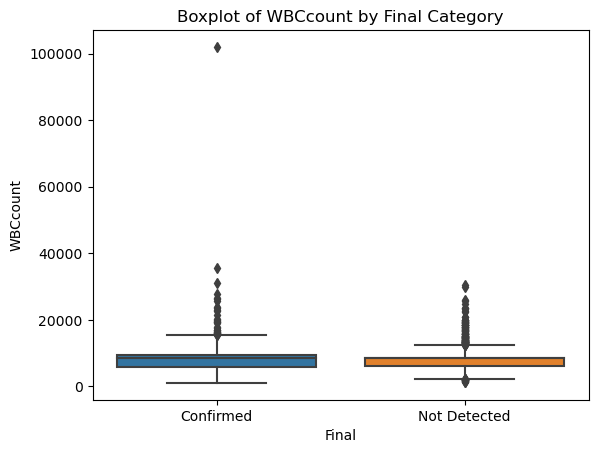

In [447]:
train = pd.concat([x_train[['WBCcount']], y_train], axis=1)
final_mapping = {1: 'Confirmed', 2: 'Not Detected'}

# Apply the mapping
train['Final'] = train['Final'].map(final_mapping)

# Create the boxplot
sns.boxplot(x='Final', y='WBCcount', data= train)

# Customize the plot (optional)
plt.title('Boxplot of WBCcount by Final Category')
plt.xlabel('Final')
plt.ylabel('WBCcount')

# Show the plot
plt.show()


         

In [488]:
train_df['Final'] = train_df['Final'].replace({1: True, 2: False})
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Replace month numbers with month names
train_df['Month'] = train_df['Month'].replace(month_mapping)

print(train_df)

     Month  Year  Final
0      Nov  2018  False
1      Jan  2018   True
2      May  2018  False
3      Jan  2018  False
4      Aug  2016  False
...    ...   ...    ...
1382   Aug  2019  False
1383   Nov  2018  False
1384   Sep  2017  False
1385   Apr  2019  False
1386   Aug  2017   True

[1387 rows x 3 columns]


In [487]:
train_df = pd.concat([x_train[['Month']],x_train[['Year']], y_train], axis=1)
train_df

,Month,Year,Final
0,11,2018,2
1,1,2018,1
2,5,2018,2
3,1,2018,2
4,8,2016,2
...,...,...,...
1382,8,2019,2
1383,11,2018,2
1384,9,2017,2
1385,4,2019,2


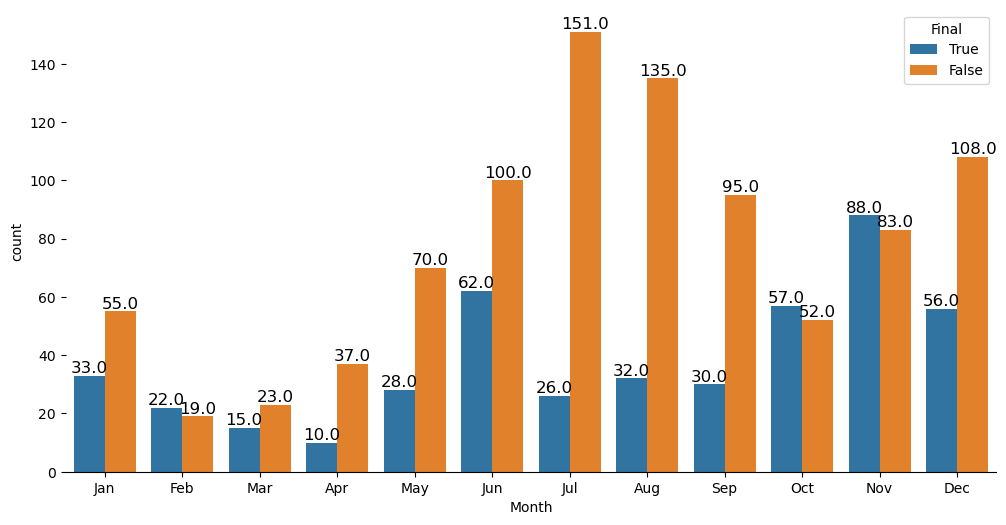

In [340]:
def plot_data_count(train_df, col, return_pct_share=True, hue=None, figsize=(12,6)):
    
    plt.figure(figsize=figsize)
    g = sns.countplot(data=train_df, x=col, hue=hue)
    total_counts = len(df)
    for rect in g.patches:
        h = rect.get_height()
        w = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        g.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=12)
        if return_pct_share:
            pct_share = h / total_counts * 100
            g.annotate(f"{pct_share:.2f}%", (x+w/2, h), ha='center', va='top', fontsize=10)
            
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()
    
    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(df[col].value_counts(normalize=True)*100)
plot_data_count(train_df, col='Month', return_pct_share=False, hue='Final')

### Line chart of the confirmed patients corresponding to the Month variable

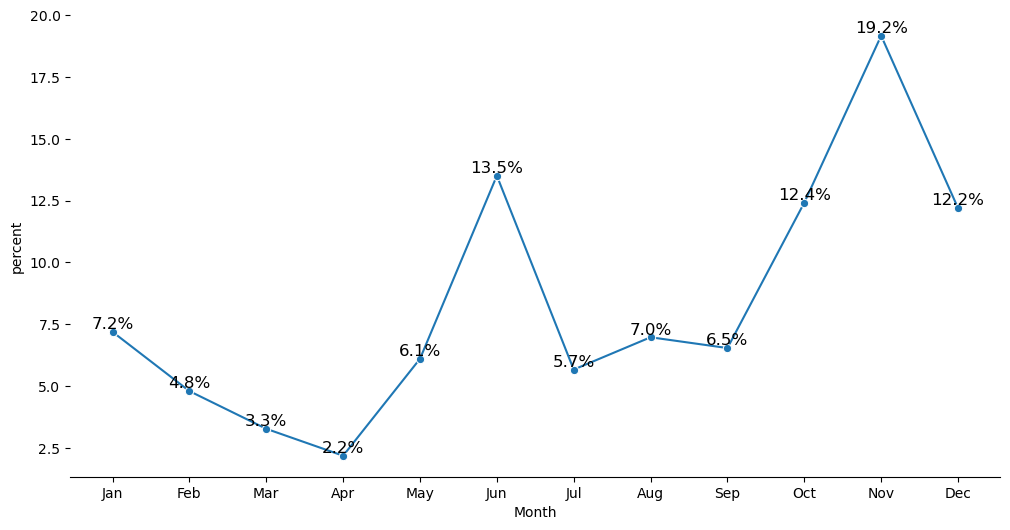

In [483]:
def plot_data_percent(train_df, col, return_pct_share=True, figsize=(12,6)):
    plt.figure(figsize=figsize)
    
    # Filter train_df to only include rows where 'Final' is True
    filtered_df = train_df[train_df['Final'] == True]
    
    # Calculate the percentage share for each category in the specified column
    pct_share_df = filtered_df[col].value_counts(normalize=True).reset_index()
    pct_share_df.columns = [col, 'percent']
    pct_share_df['percent'] *= 100
    
    # Plot the line chart
    g = sns.lineplot(data=pct_share_df, x=col, y='percent', marker='o')
    
    # Annotate each point with the percentage value
    for i, row in pct_share_df.iterrows():
        g.annotate(f"{row['percent']:.1f}%", (row[col], row['percent']), ha='center', va='bottom', fontsize=12)
        
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()

    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(filtered_df[col].value_counts(normalize=True) * 100)

# Assuming you have already defined train_df
plot_data_percent(train_df, col='Month', return_pct_share=False)

### plot of line charts corresponding to 2016,2017,2018,2019 years with the percentages of confirmed patients.

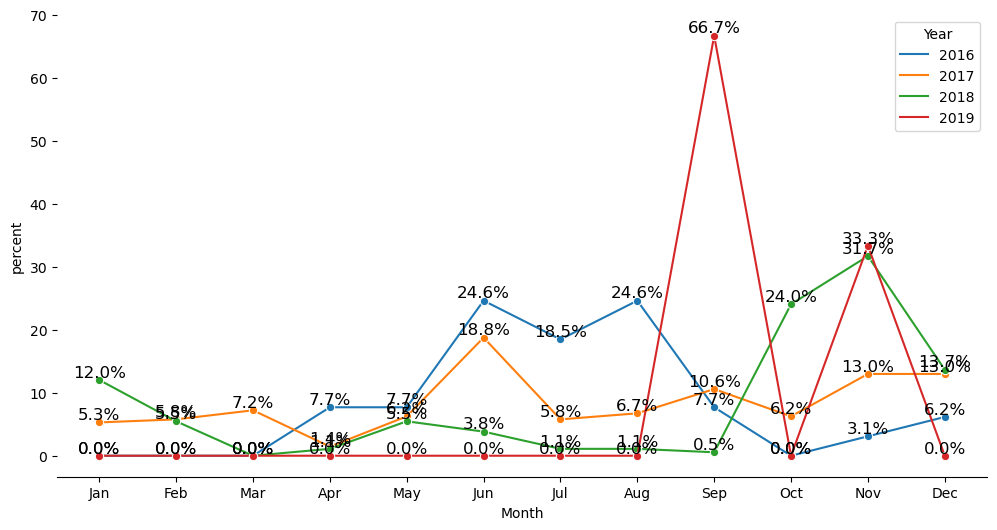

In [490]:
def plot_data_percent(train_df, col, return_pct_share=True, figsize=(12,6)):
    plt.figure(figsize=figsize)
    
    # Filter train_df to only include rows where 'Final' is True
    filtered_df = train_df[train_df['Final'] == True]
    
    # Calculate the percentage share for each category in the specified column grouped by 'Year'
    count_df = filtered_df.groupby(['Year', col]).size().reset_index(name='count')
    total_df = filtered_df.groupby('Year').size().reset_index(name='total')
    pct_share_df = pd.merge(count_df, total_df, on='Year')
    pct_share_df['percent'] = 100 * pct_share_df['count'] / pct_share_df['total']
    
    # Plot the line chart
    g = sns.lineplot(data=pct_share_df, x=col, y='percent', hue='Year', marker='o')
    
    # Annotate each point with the percentage value
    for year in pct_share_df['Year'].unique():
        year_df = pct_share_df[pct_share_df['Year'] == year]
        for i, row in year_df.iterrows():
            g.annotate(f"{row['percent']:.1f}%", (row[col], row['percent']), ha='center', va='bottom', fontsize=12)
    
    g.spines['top'].set_visible(False)
    g.spines['right'].set_visible(False)
    g.spines['left'].set_visible(False)
    
    plt.show()

    if return_pct_share:
        print("\n")
        print("Percent share for each category:")
        print(pct_share_df[['Year', col, 'percent']])

# Assuming you have already defined train_df
plot_data_percent(train_df, col='Month', return_pct_share=False)

### Accoring to the above bar chart of Final varaible against the Month variable we can clearly see the percentage of confirmed patients is high in the months of June,November and Octomber. So in this line charts related to 2016,2017,2018,and 2019 can be also seen the same pattern in peaks of this line charts.

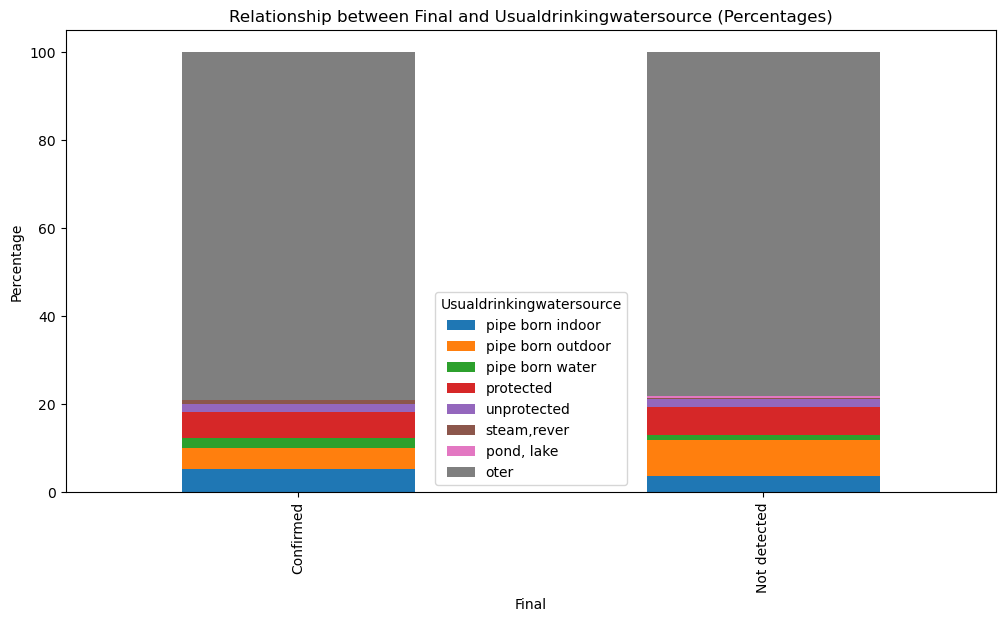

In [421]:
x_train['Usualdrinkingwatersource'].value_counts()
x_train['Usualdrinkingwatersource'] = x_train['Usualdrinkingwatersource'].astype('category')
combined_df = pd.concat([x_train[['Usualdrinkingwatersource']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})

# Replace numerical categories with descriptive labels for 'Isolate' variable
combined_df['Usualdrinkingwatersource'] = combined_df['Usualdrinkingwatersource'].replace({1: 'pipe born indoor', 2: 'pipe born outdoor ', 3: 'pipe born water', 4: 'protected', 5: 'unprotected', 6: 'steam,rever', 7: 'pond, lake', 8: 'oter'})

# Create a crosstab to get the counts for each combination of 'Final' and 'Isolate'
crosstab = pd.crosstab(combined_df['Final'], combined_df['Usualdrinkingwatersource'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and Usualdrinkingwatersource (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='Usualdrinkingwatersource')
plt.show()

In [479]:
train_df

,WBCcount,WBCcount,WBCcount,WBCcount,WBCcount,Final
0,13030.000000,13030.000000,13030.000000,13030.000000,13030.000000,Not Detected
1,2700.000000,2700.000000,2700.000000,2700.000000,2700.000000,Confirmed
2,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,Not Detected
3,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,Not Detected
4,8526.303477,8526.303477,8526.303477,8526.303477,8526.303477,Not Detected
...,...,...,...,...,...,...
1382,8526.303477,8526.303477,8526.303477,8526.303477,8526.303477,Not Detected
1383,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,Not Detected
1384,8526.303477,8526.303477,8526.303477,8526.303477,8526.303477,Not Detected
1385,8526.303477,8526.303477,8526.303477,8526.303477,8526.303477,Not Detected


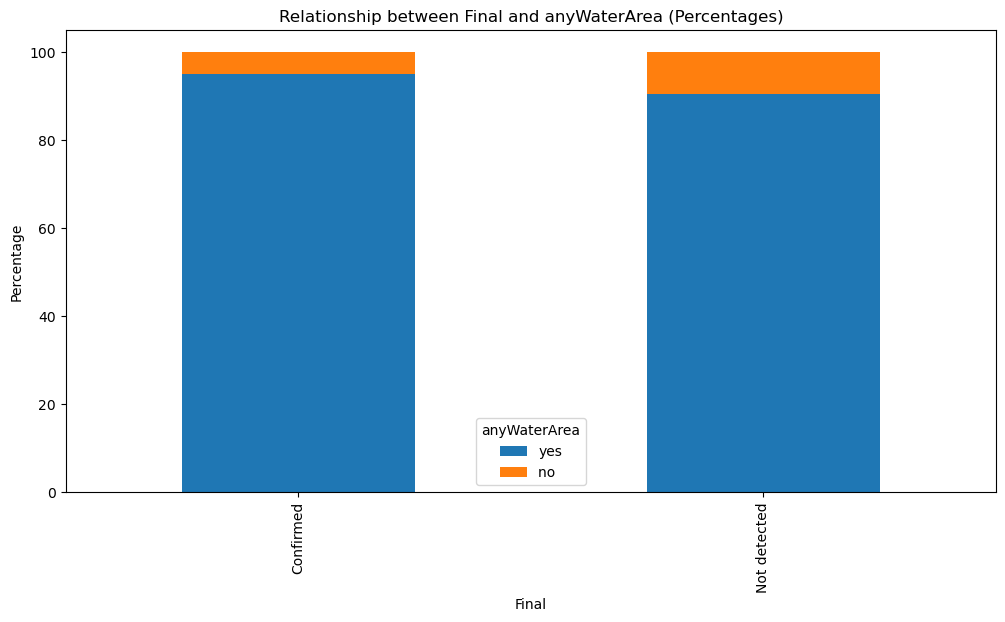

In [460]:
x_train['anyWaterArea'] = x_train['anyWaterArea'].astype('category')
combined_df = pd.concat([x_train[['anyWaterArea']], y], axis=1)
combined_df['Final'] = combined_df['Final'].replace({1: 'Confirmed', 2: 'Not detected'})

# Replace numerical categories with descriptive labels for 'Isolate' variable
combined_df['anyWaterArea'] = combined_df['anyWaterArea'].replace({1: 'yes', 2: 'no '})

# Create a crosstab to get the counts for each combination of 'Final' and 'Isolate'
crosstab = pd.crosstab(combined_df['Final'], combined_df['anyWaterArea'])

# Convert counts to percentages
crosstab_percentage = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart with percentages
crosstab_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Relationship between Final and anyWaterArea (Percentages)')
plt.xlabel('Final')
plt.ylabel('Percentage')
plt.legend(title='anyWaterArea')
plt.show()

### According to this bar plot, we can observe the ones who are close(home,workplace)to any water area confirmed as leptospirosis patients compared to others. Because which make sense that water areas canbe considered as a media of spreeding this disease.

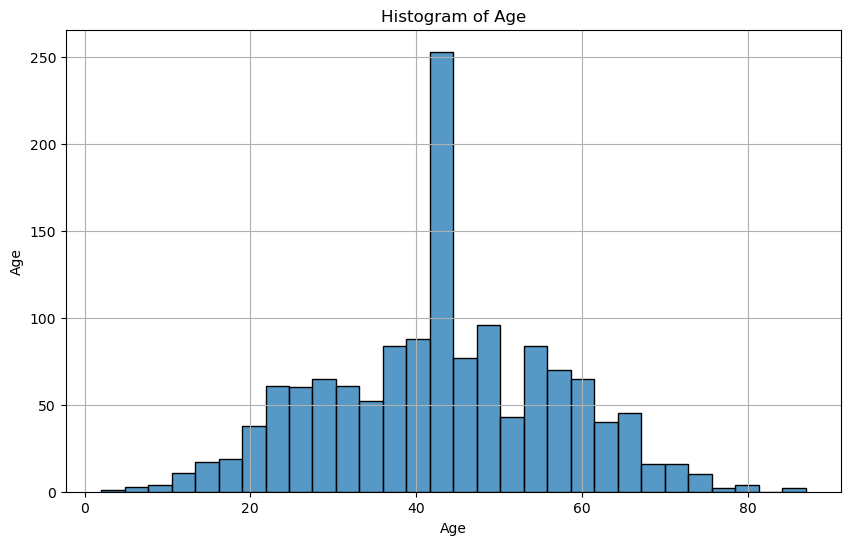

In [422]:
plt.figure(figsize=(10, 6))
sns.histplot(x_train['Age'].dropna(), bins=30, kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

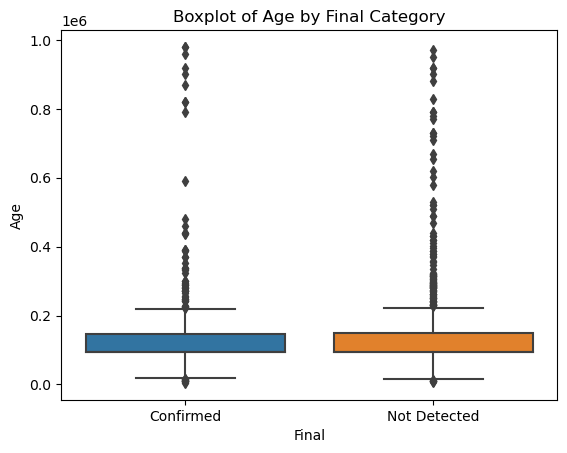

In [451]:
train = pd.concat([x_train[['Plateletcount']], y_train], axis=1)
final_mapping = {1: 'Confirmed', 2: 'Not Detected'}

# Apply the mapping
train['Final'] = train['Final'].map(final_mapping)

# Create the boxplot
sns.boxplot(x='Final', y='Plateletcount', data= train)

# Customize the plot (optional)
plt.title('Boxplot of Age by Final Category')
plt.xlabel('Final')
plt.ylabel('Age')

# Show the plot
plt.show()


In [430]:
cc=['HeadacheDays','FeverDays']

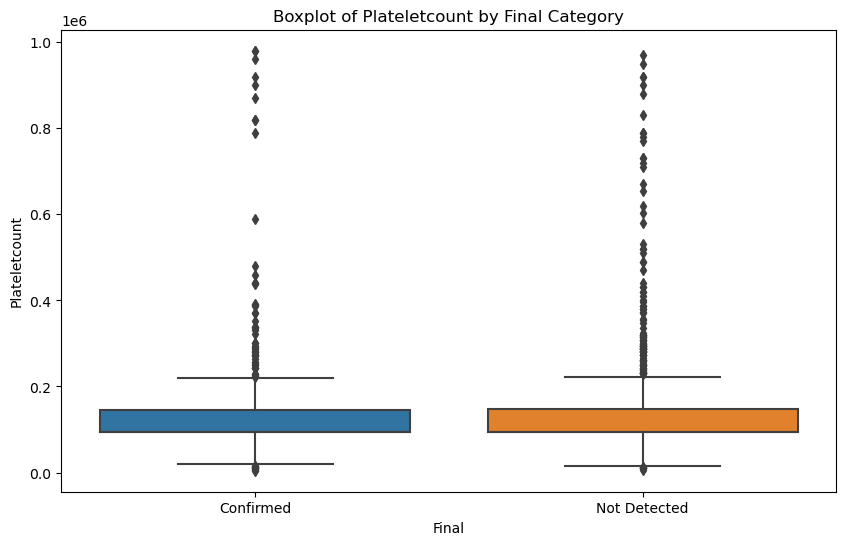

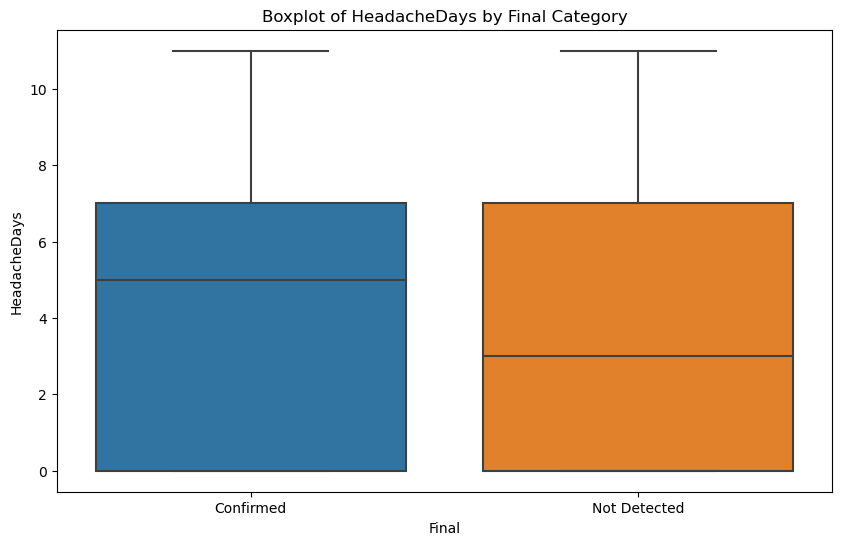

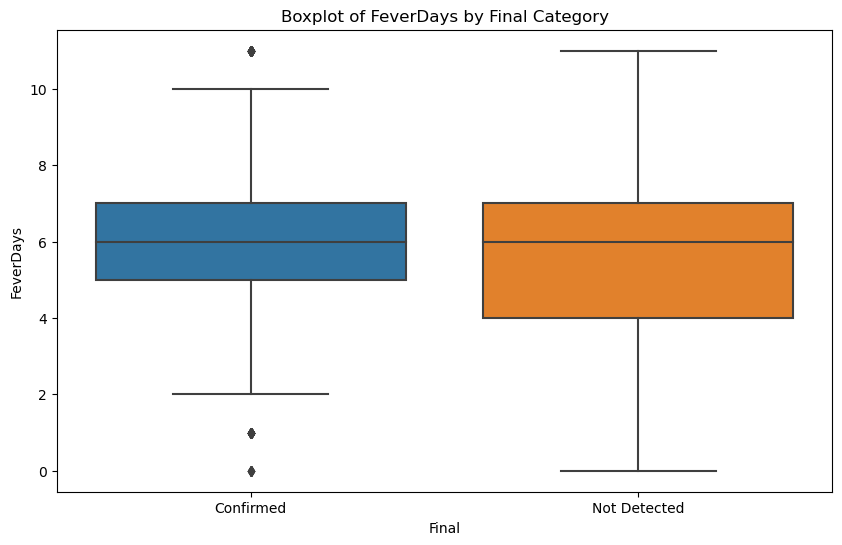

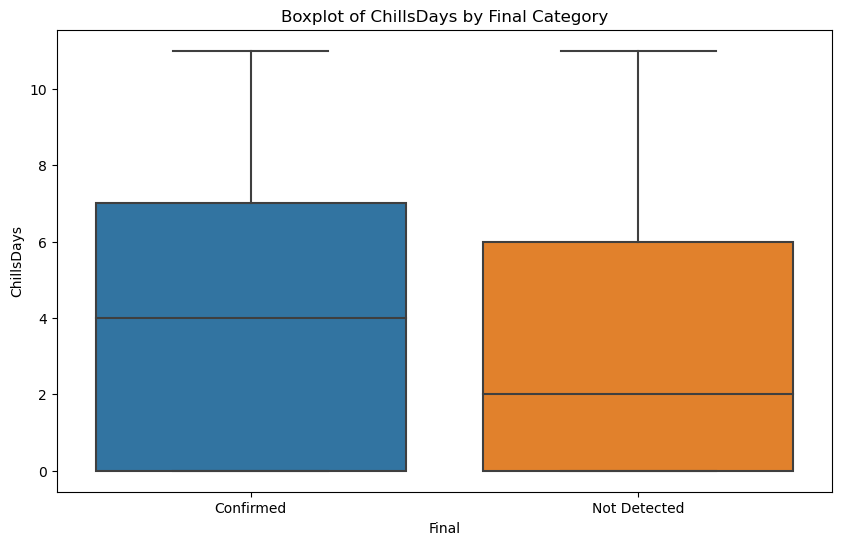

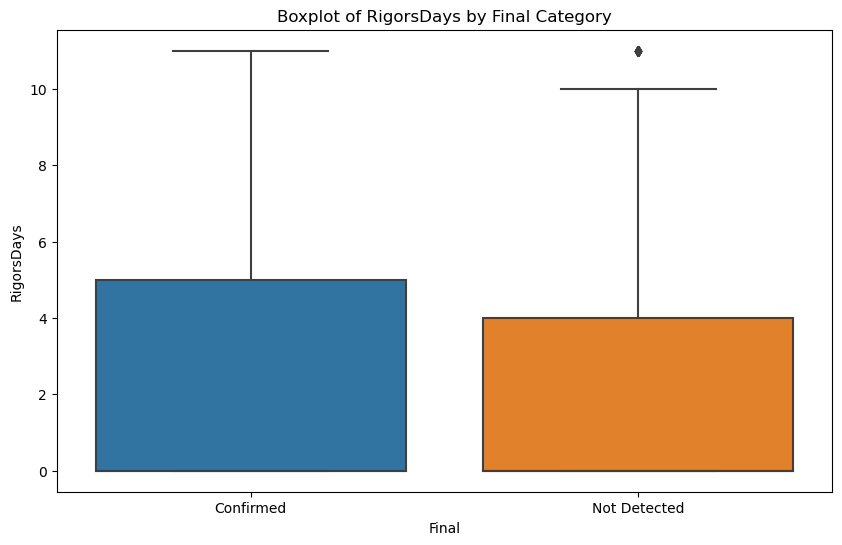

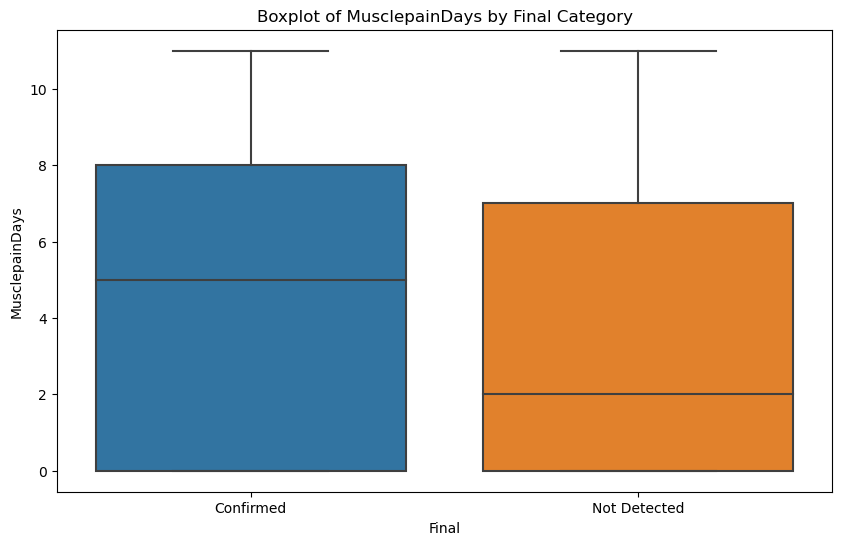

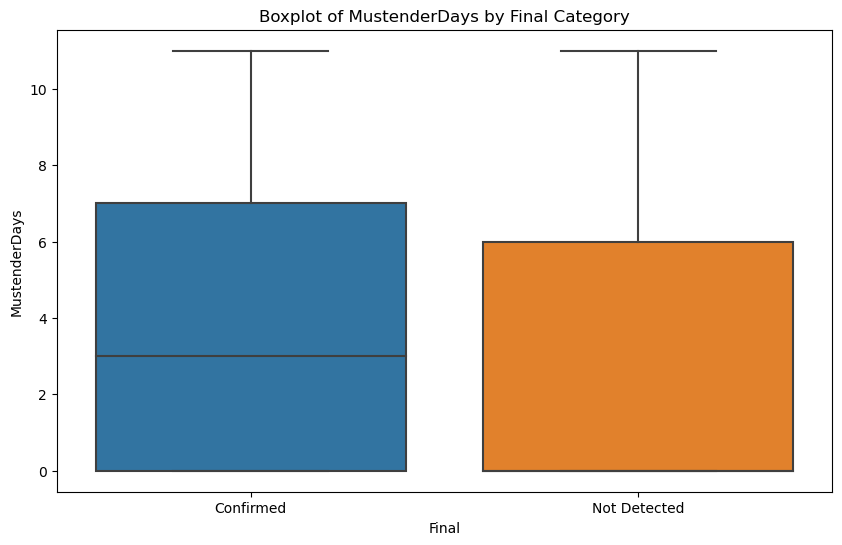

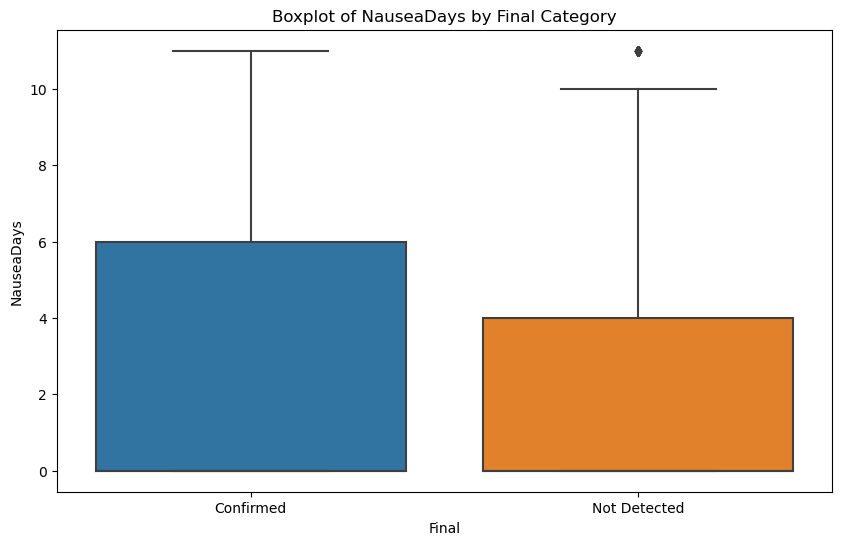

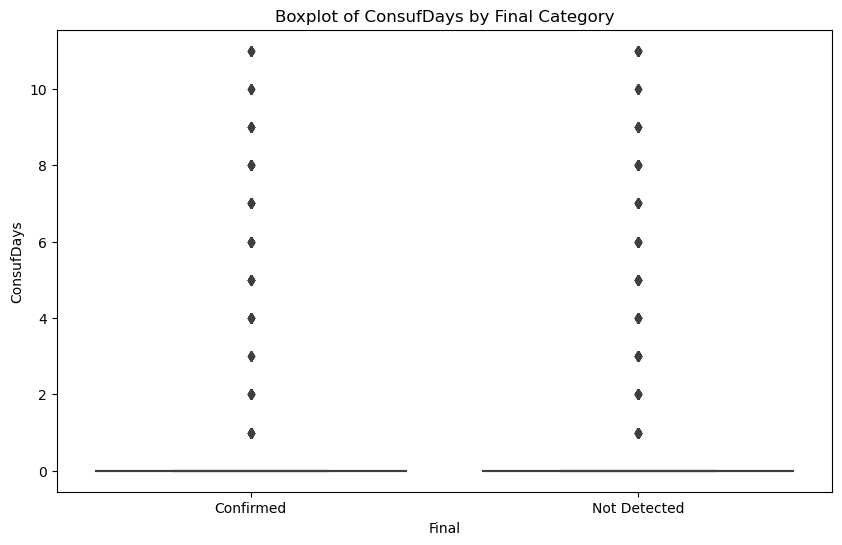

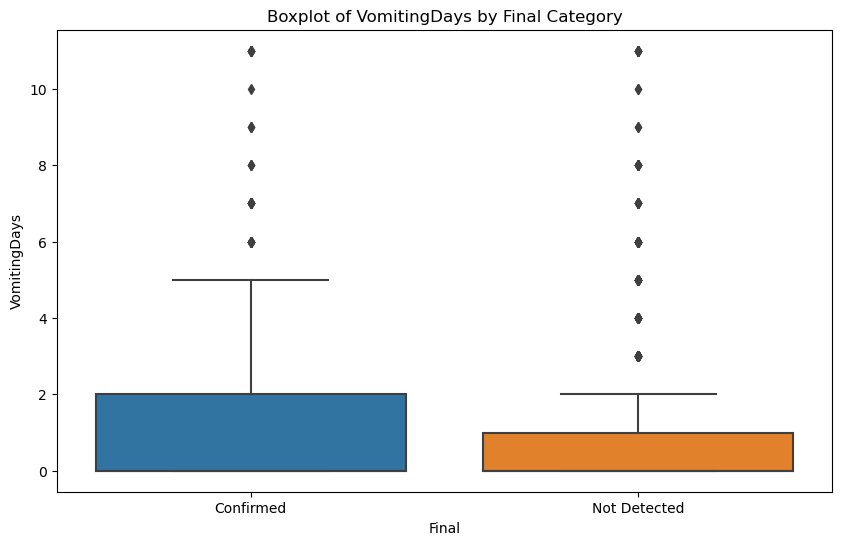

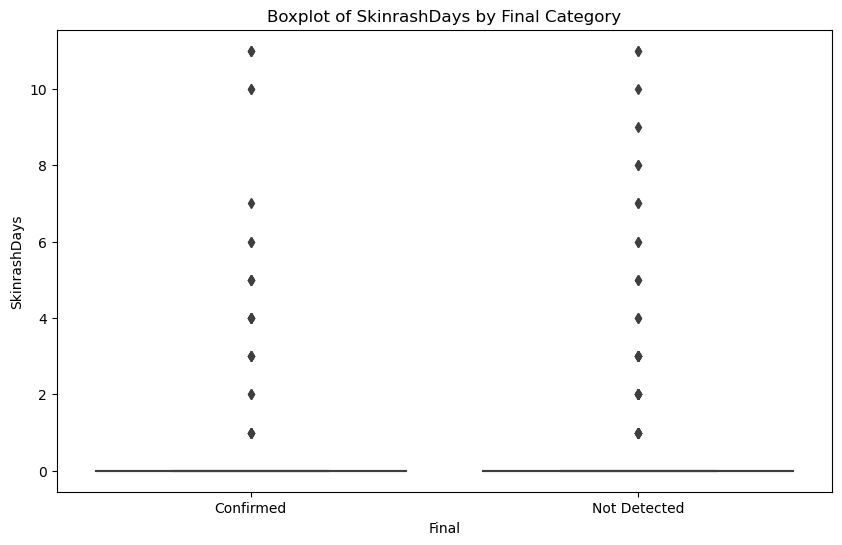

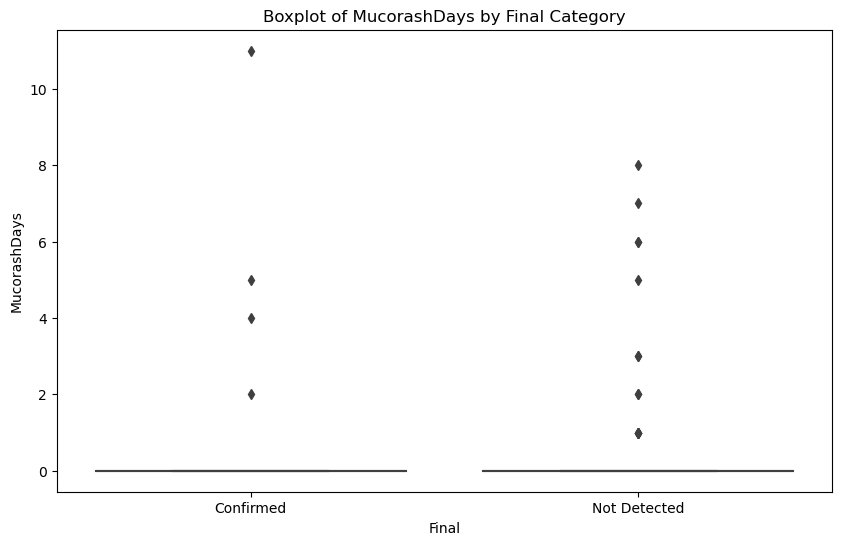

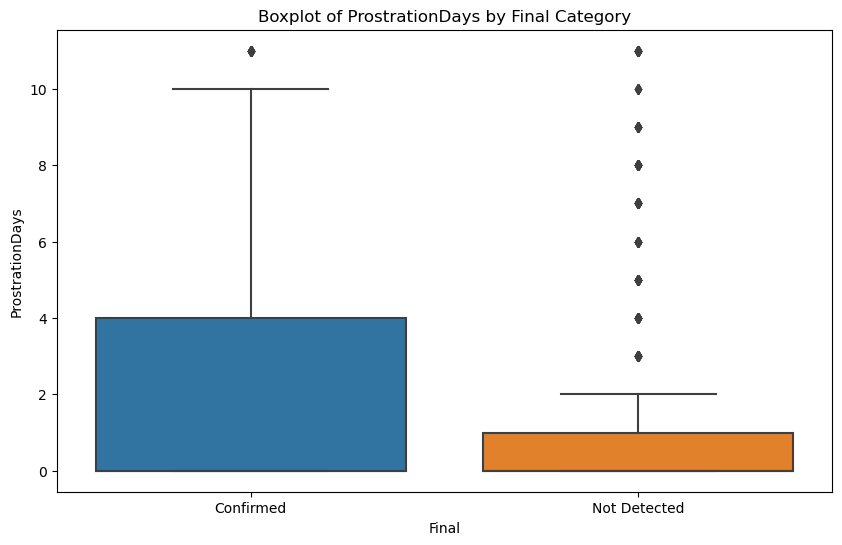

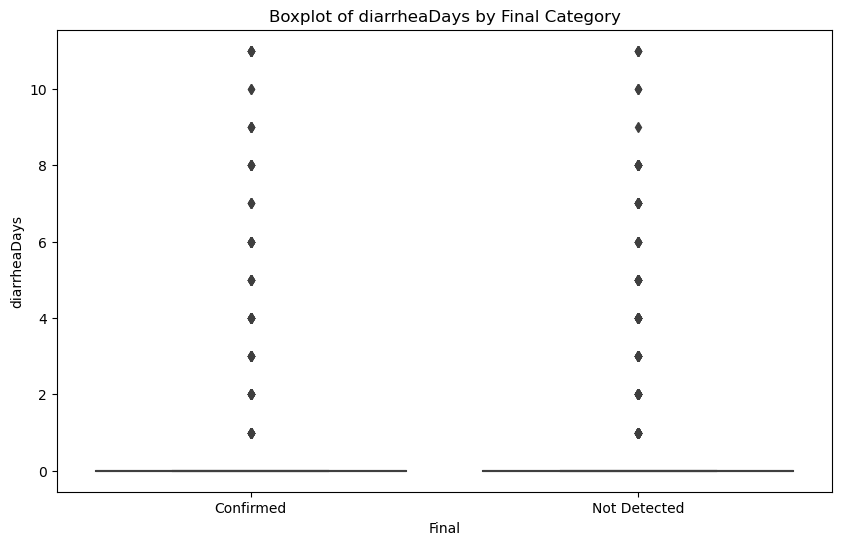

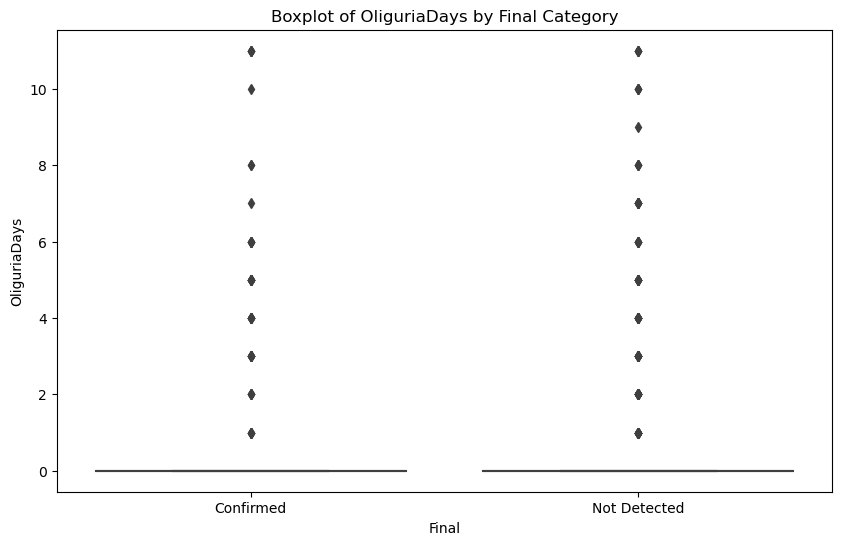

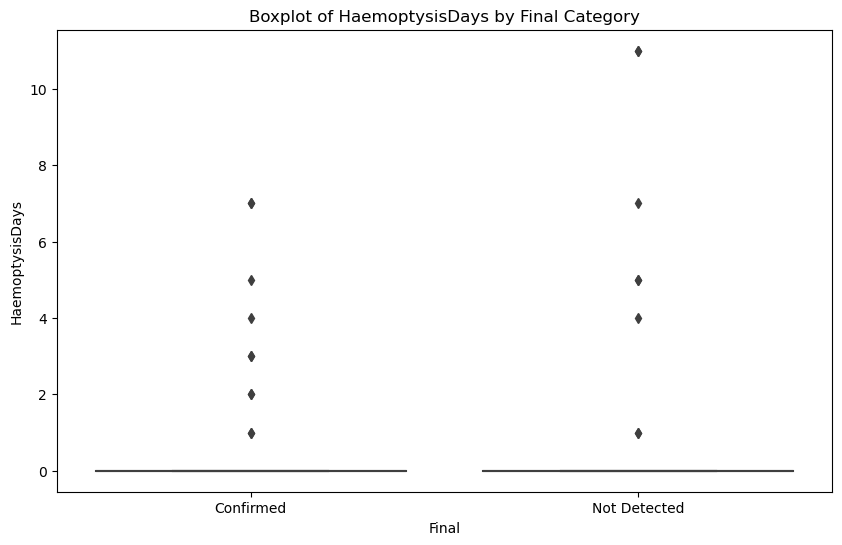

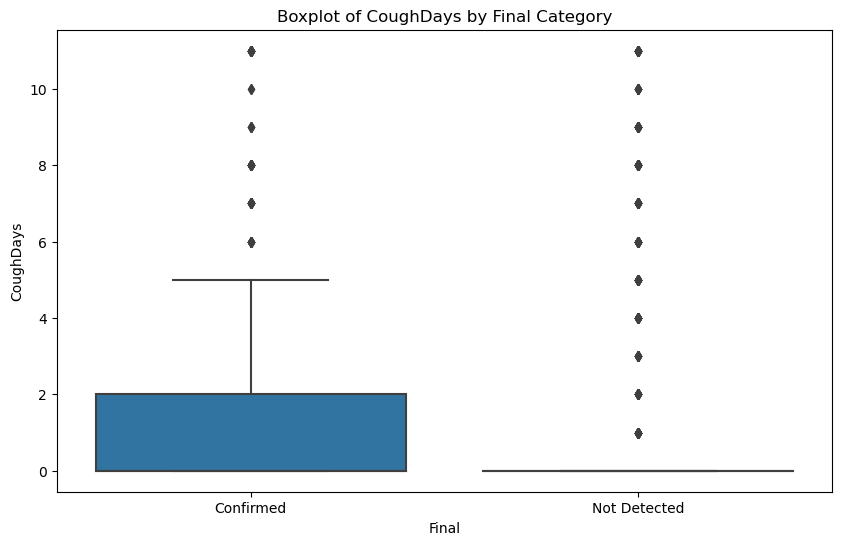

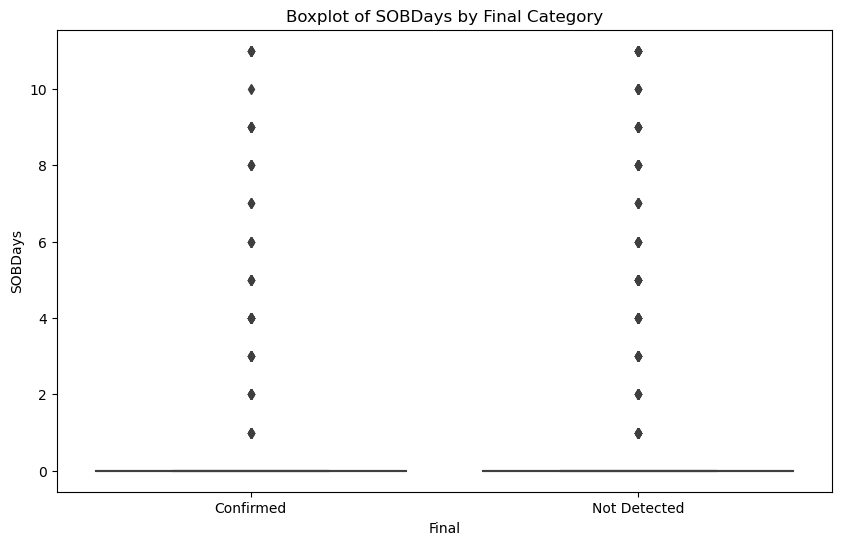

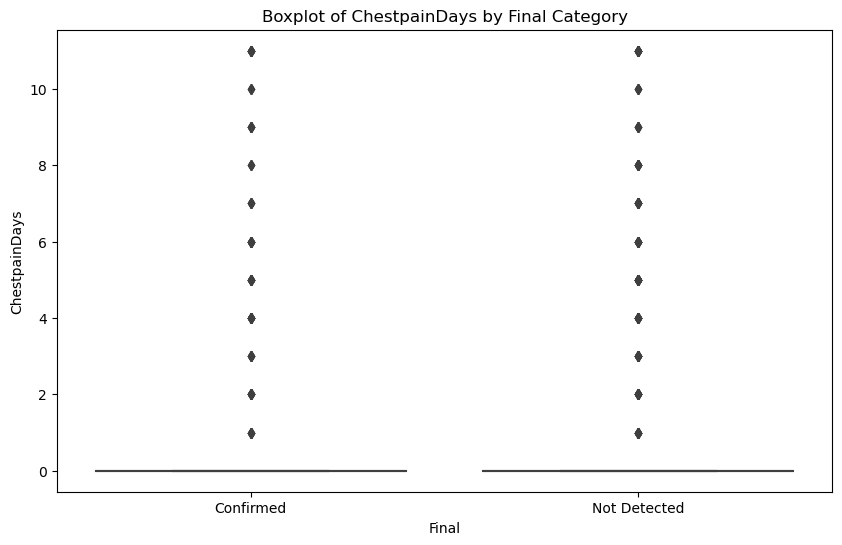

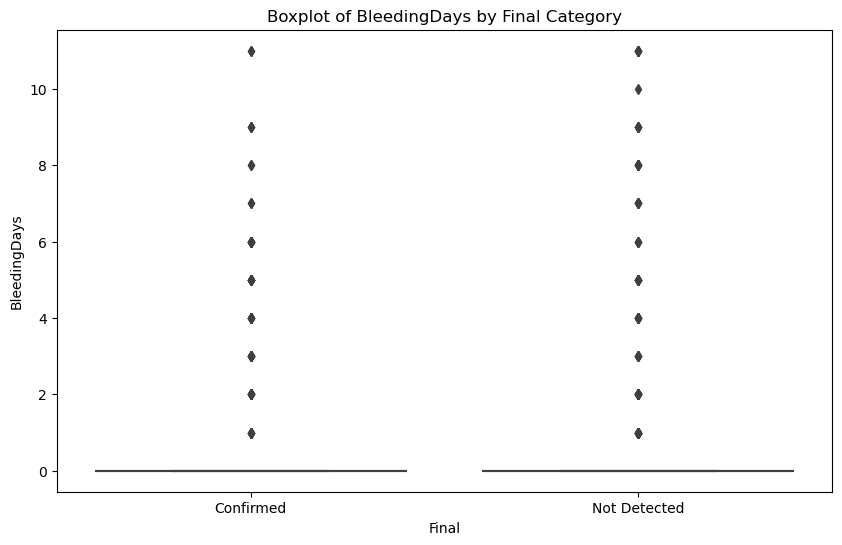

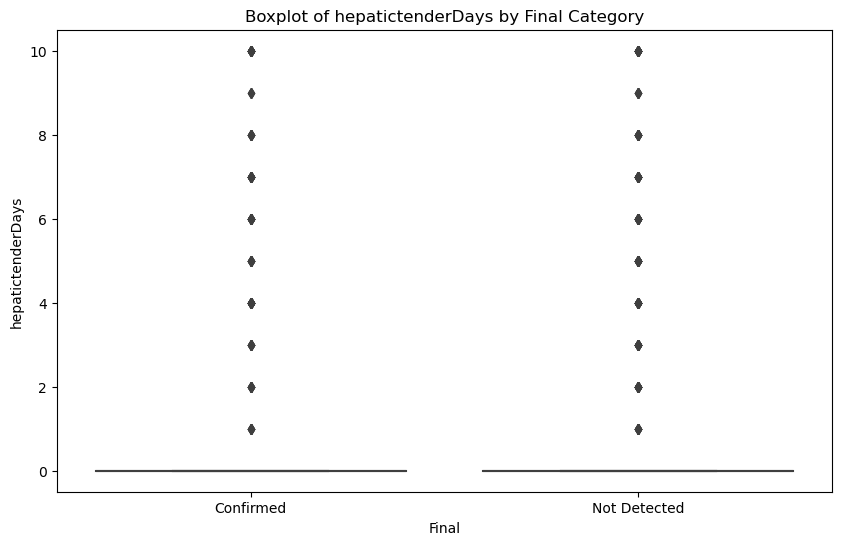

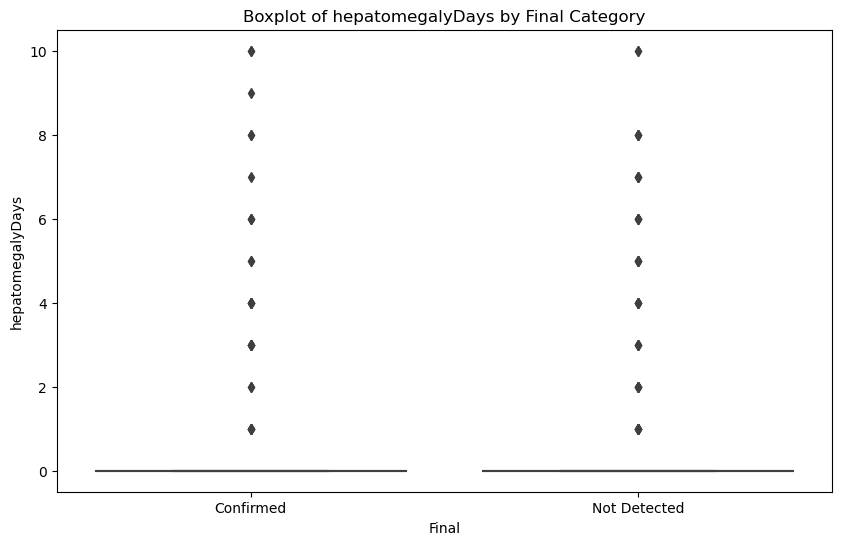

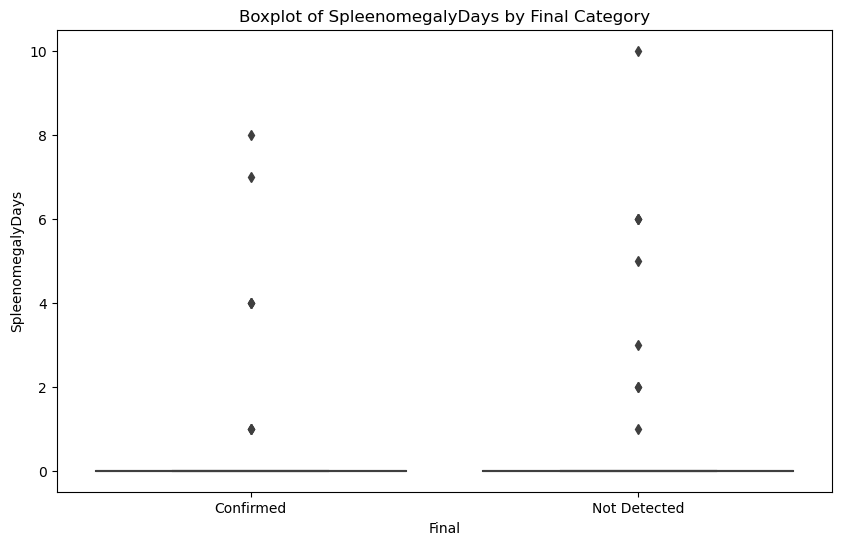

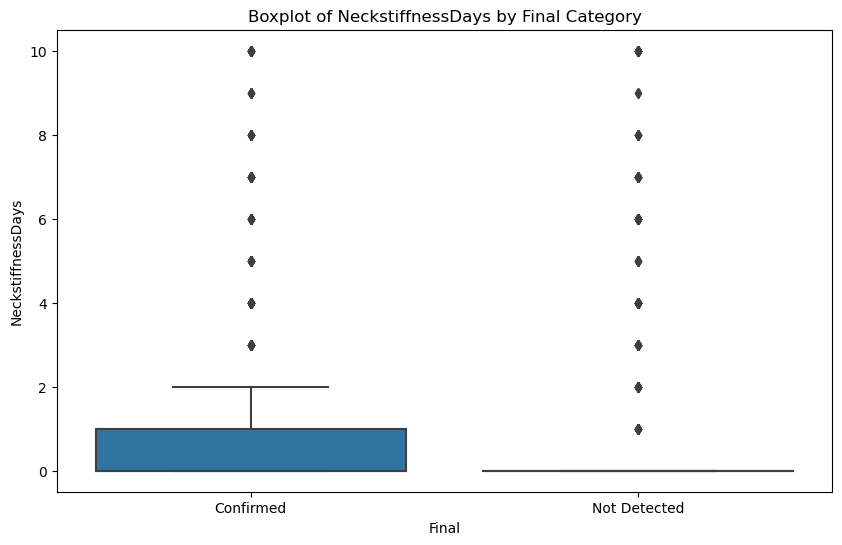

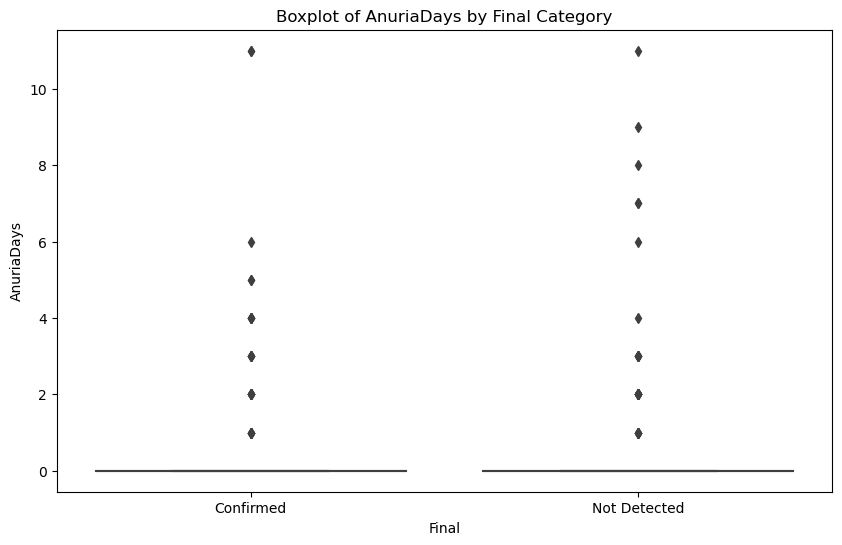

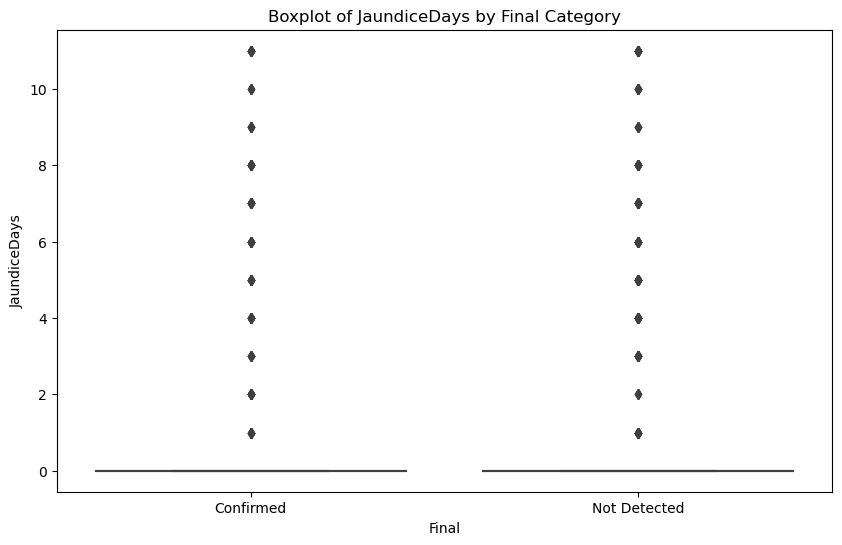

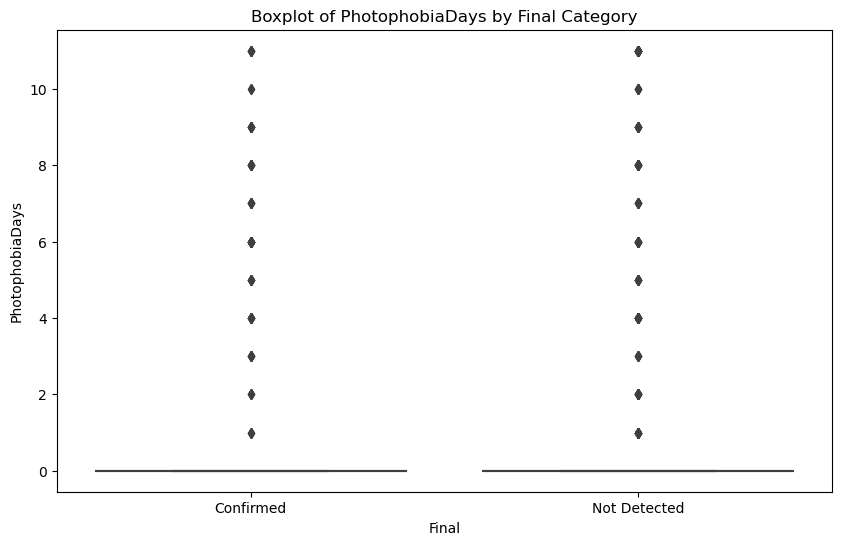

In [454]:
train = pd.concat([x_train[['Plateletcount', 'HeadacheDays', 'FeverDays','ChillsDays','RigorsDays','MusclepainDays','MustenderDays','NauseaDays','ConsufDays', 'VomitingDays','SkinrashDays','MucorashDays','ProstrationDays','diarrheaDays','OliguriaDays','HaemoptysisDays','CoughDays','SOBDays','ChestpainDays','BleedingDays','hepatictenderDays','hepatomegalyDays','SpleenomegalyDays','NeckstiffnessDays','AnuriaDays','JaundiceDays','PhotophobiaDays']], y_train], axis=1)
final_mapping = {1: 'Confirmed', 2: 'Not Detected'}

# Apply the mapping
train['Final'] = train['Final'].map(final_mapping)

# List of variables to plot
cc = ['Plateletcount', 'HeadacheDays', 'FeverDays','ChillsDays','RigorsDays','MusclepainDays','MustenderDays','NauseaDays','ConsufDays', 'VomitingDays','SkinrashDays','MucorashDays','ProstrationDays','diarrheaDays','OliguriaDays','HaemoptysisDays','CoughDays','SOBDays','ChestpainDays','BleedingDays','hepatictenderDays','hepatomegalyDays','SpleenomegalyDays','NeckstiffnessDays','AnuriaDays','JaundiceDays','PhotophobiaDays']

# Create boxplots for each variable in cc
for variable in cc:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Final', y=variable, data=train)
    plt.title(f'Boxplot of {variable} by Final Category')
    plt.xlabel('Final')
    plt.ylabel(variable)
    plt.show()

### Considering the boxplot of musclepaindays related to the Final varaible, The median duration of muscle pain is higher in the 'confirmed' category compared to the 'not detected' category, indicating that individuals with confirmed cases tend to experience longer muscle pain and  the 'confirmed' category shows right skewness with a few instances of very long muscle pain durations, while the 'not detected' category is more symmetrically distributed.

### According to neckstiffnessday,coughdays boxplots, we can see that 50% of confirmed patients has these two symptoms more than 2 days.But we can see only few outliers in the not detected distribution.Also The IQR is also wider in the 'confirmed' category, suggesting greater variability in coughdays and neckstiffdays  duration among confirmed cases.

### The symptoms nausea,vomitting,mustender,and rigors has wider range in the confirmed cases than compaired to other. So as a summary of the descriptive analysis we identified that age,feverdays,musclepaindays,anywaterarea,rigorsdays,month,WBCcount,WPqPCRDiagnosis,Possibleexposure,Pastantibiotics and Prophylactics are some of significant factors that can be affect to the status of leptospiros.

## Cluster Analysis

### main purpose of the cluster analysis is to identify the patient segments within that groups variation is very low but between the groups there's high variation.Identify the particular symptoms in a group and how there're differed from group to group.Here for clustering analysis we do not consider the response variable, and we identify the particular relationships that are special for a particular cluster group then we can easily cluster a new patient to the clusters and go with further analysis steps(fitting classification models to clusters )

In [470]:
from prince import FAMD
import seaborn as sns

In [462]:
import prince
famd = prince.FAMD(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    random_state=1000,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(x_train)

In [463]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,243.127,2.52%,2.52%
1,207.289,2.15%,4.68%


In [464]:
factor_coordinates=famd.row_coordinates(x_train)
factor_coordinates

component,0,1
0,42.820116,28.556863
1,9.723904,-14.024638
2,2.866619,-14.278545
3,38.198644,34.778645
4,-10.296290,1.429892
...,...,...
1382,-17.431398,13.526686
1383,30.236159,14.141964
1384,-15.651555,6.119013
1385,-16.357592,13.761311


In [465]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=100)
clusters = kmeans.fit_predict(factor_coordinates)

In [466]:
X_with_clusters = x_train.copy()  # Assuming X is your original DataFrame
X_with_clusters['Cluster'] = clusters

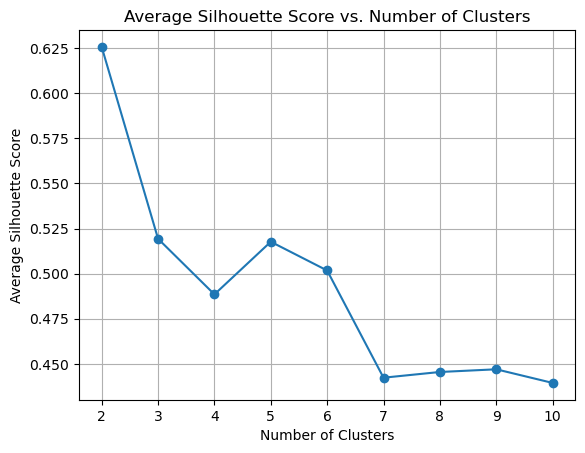

In [467]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster_range = range(2, 11)  # You can adjust this range

# Initialize lists to store the number of clusters and corresponding silhouette scores
num_clusters = []
silhouette_scores = []

# Iterate over different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    clusters = kmeans.fit_predict(factor_coordinates)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(factor_coordinates, clusters)
    
    # Append the number of clusters and silhouette score to lists
    num_clusters.append(n_clusters)
    silhouette_scores.append(silhouette_avg)

# Plot the number of clusters against the average silhouette score
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

### According to the above silhouette plot, select the number of clusters as 2 because corresponding silhouette score is the highest one and greater than 0.5

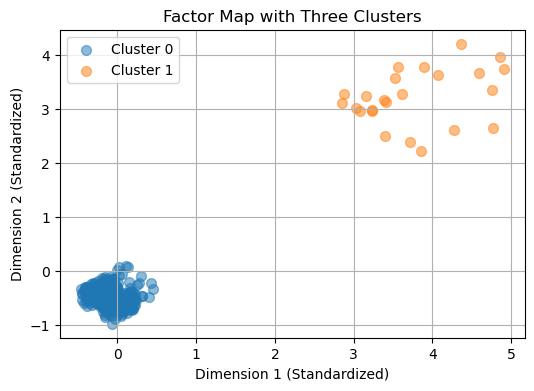

In [469]:
standardized_coordinates = (factor_coordinates - factor_coordinates.mean()) / factor_coordinates.std()

# Plot the factor map with three clusters
plt.figure(figsize=(6, 4))
for cluster_label in range(2):
    plt.scatter(standardized_coordinates.iloc[clusters == cluster_label, 0], 
                standardized_coordinates.iloc[clusters == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5, marker='o', s=50)
plt.title('Factor Map with Three Clusters')
plt.xlabel('Dimension 1 (Standardized)')
plt.ylabel('Dimension 2 (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

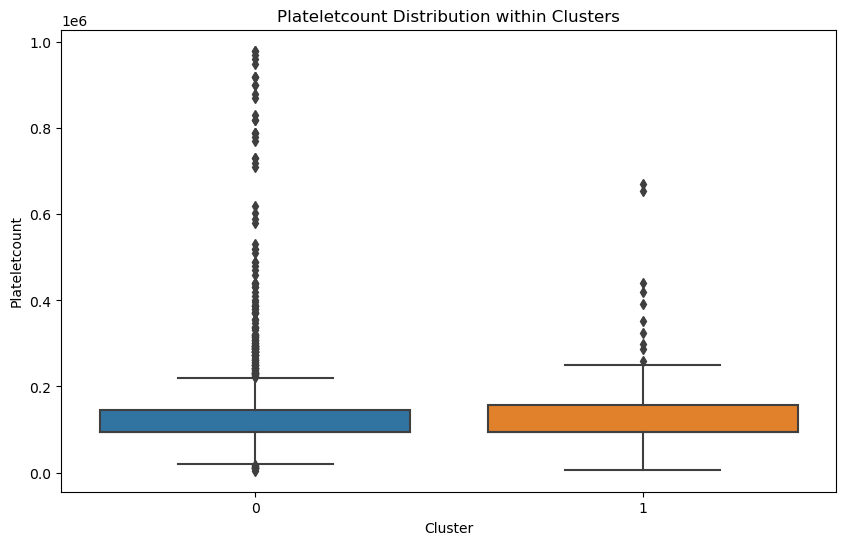

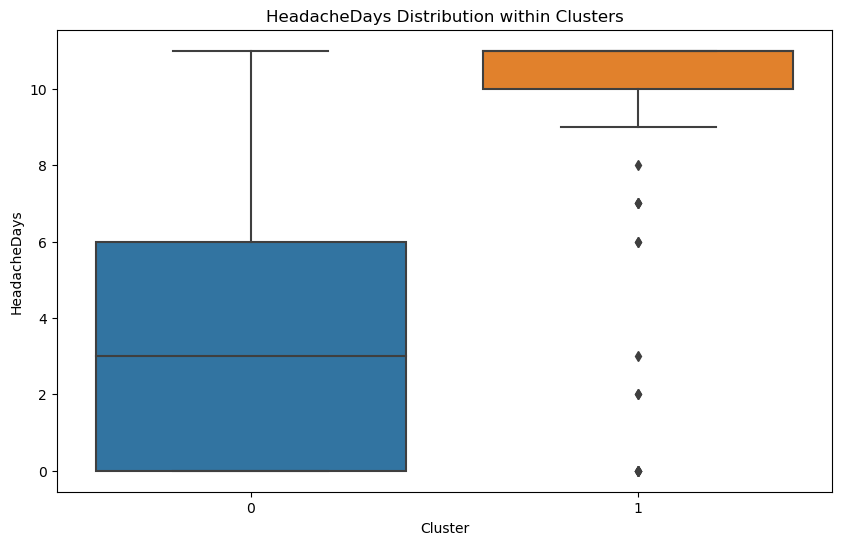

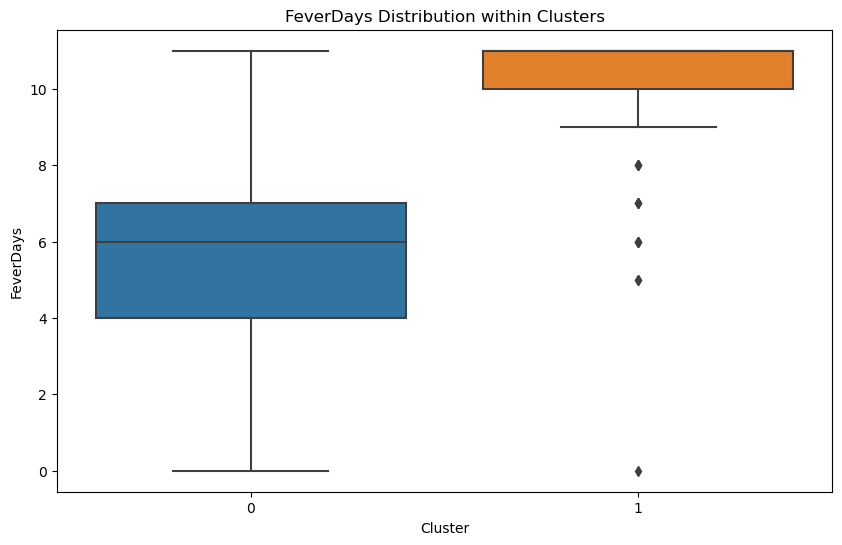

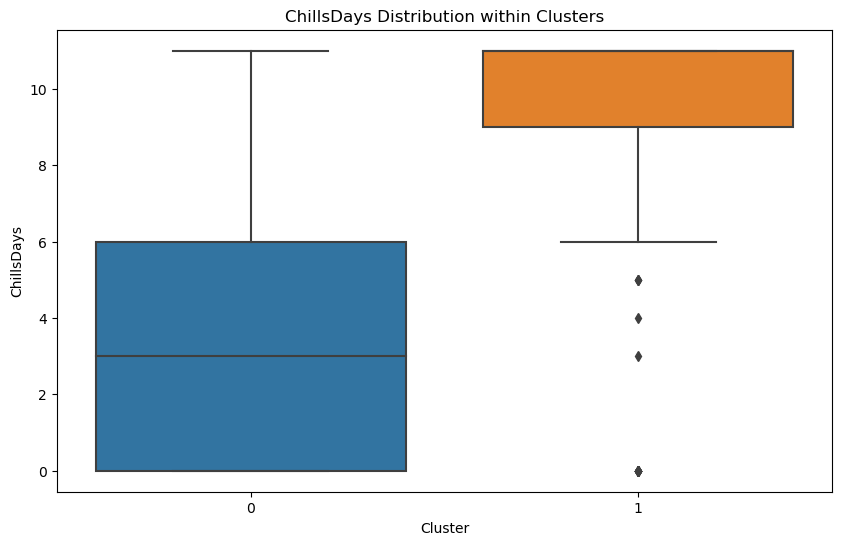

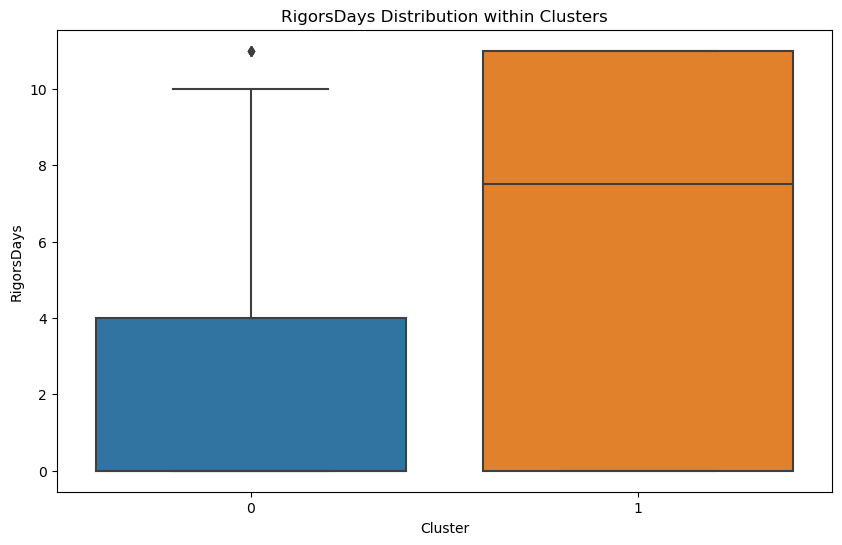

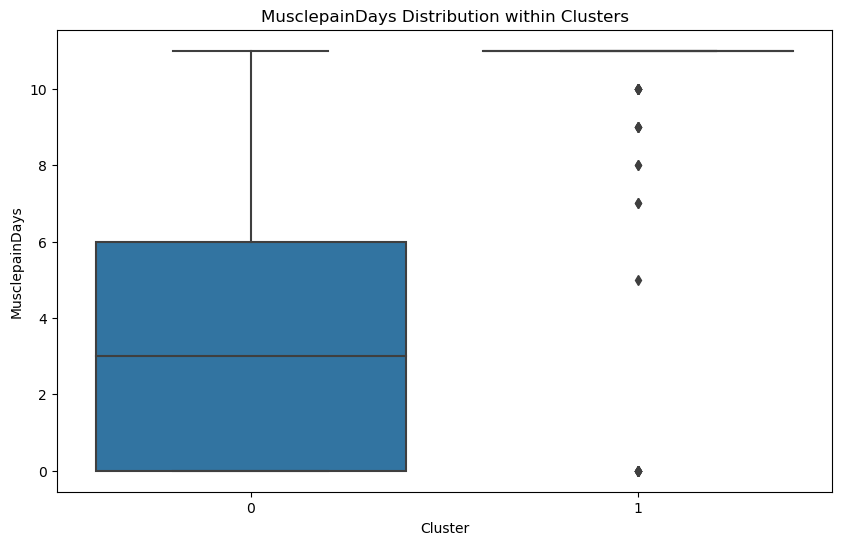

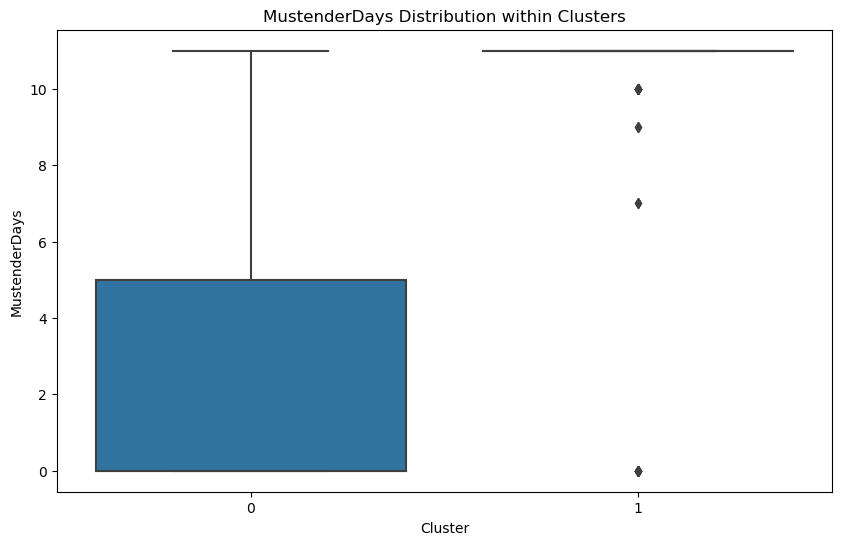

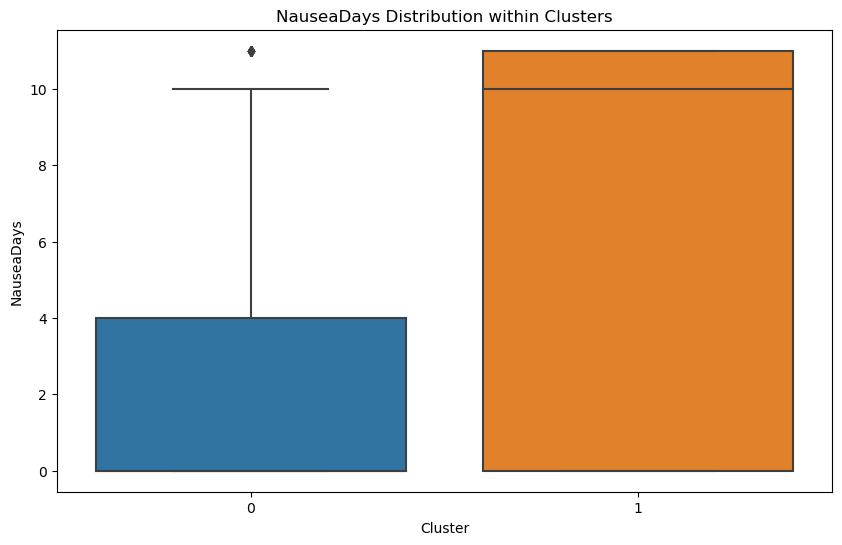

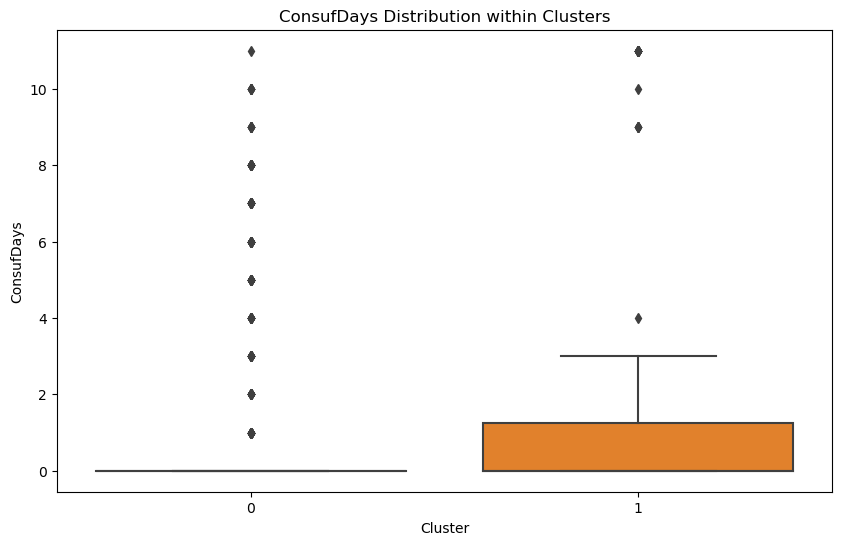

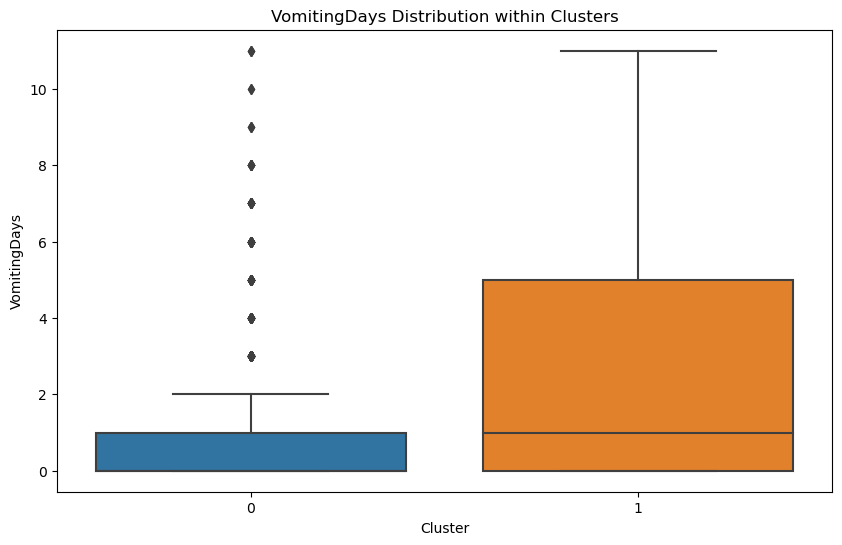

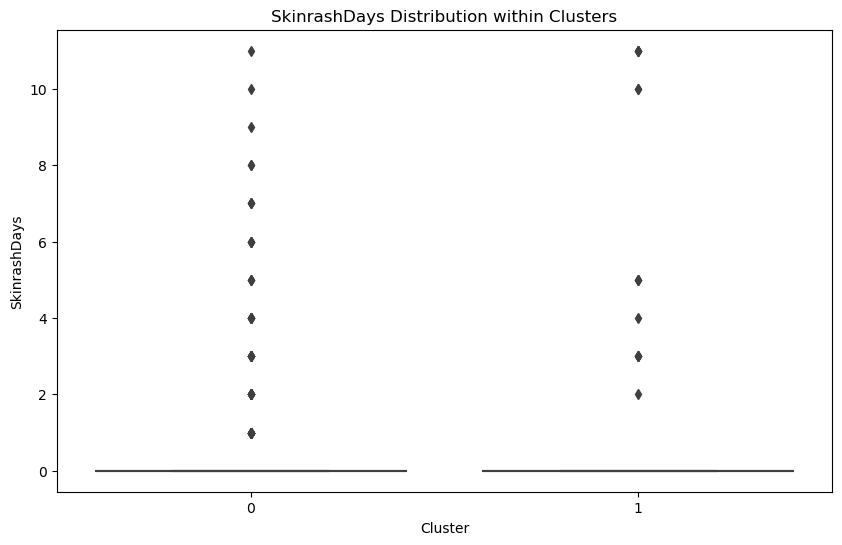

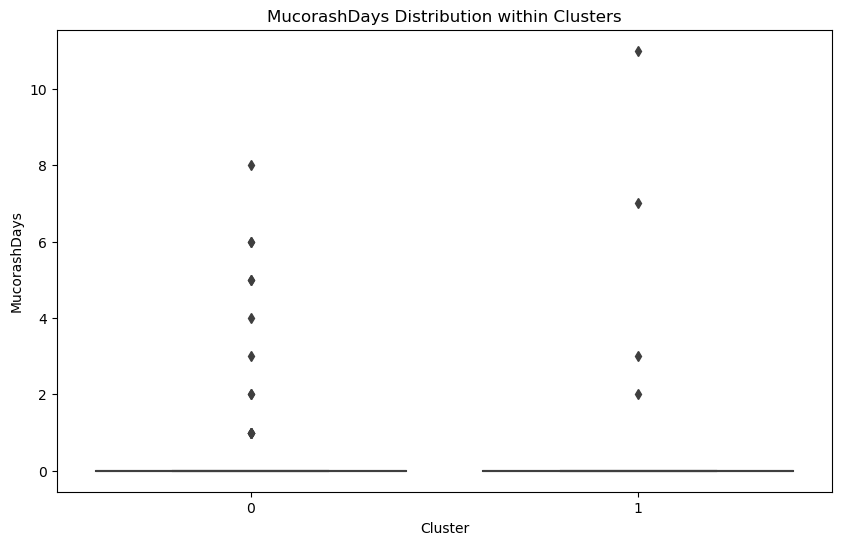

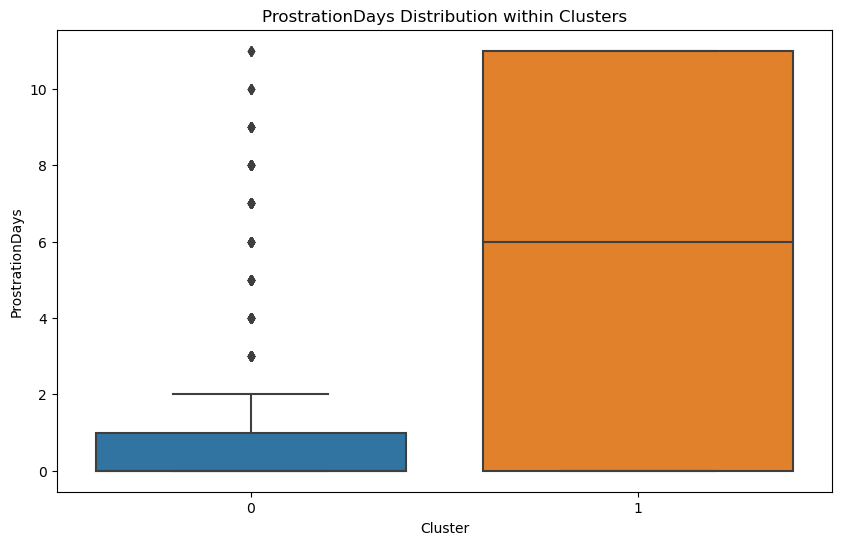

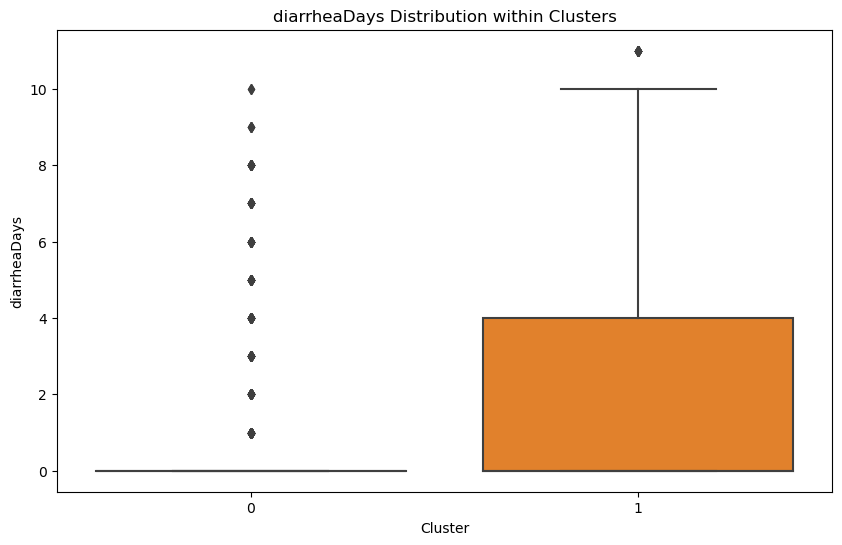

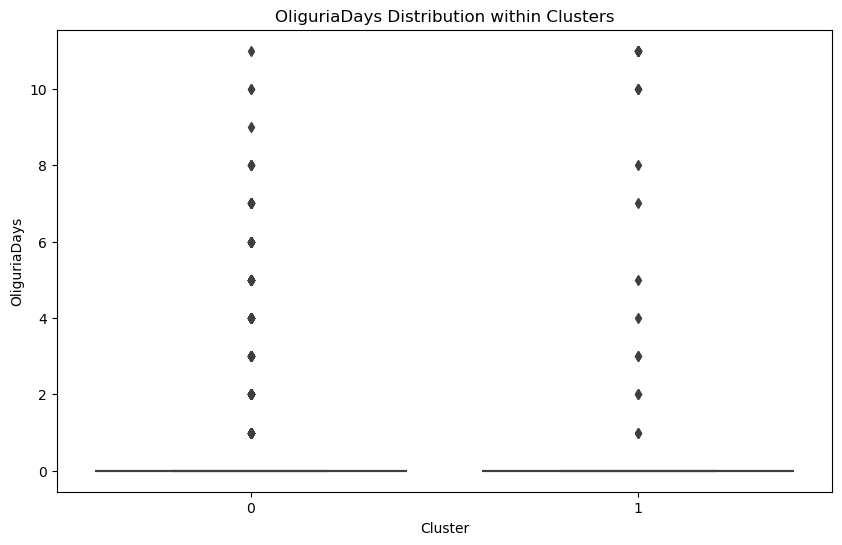

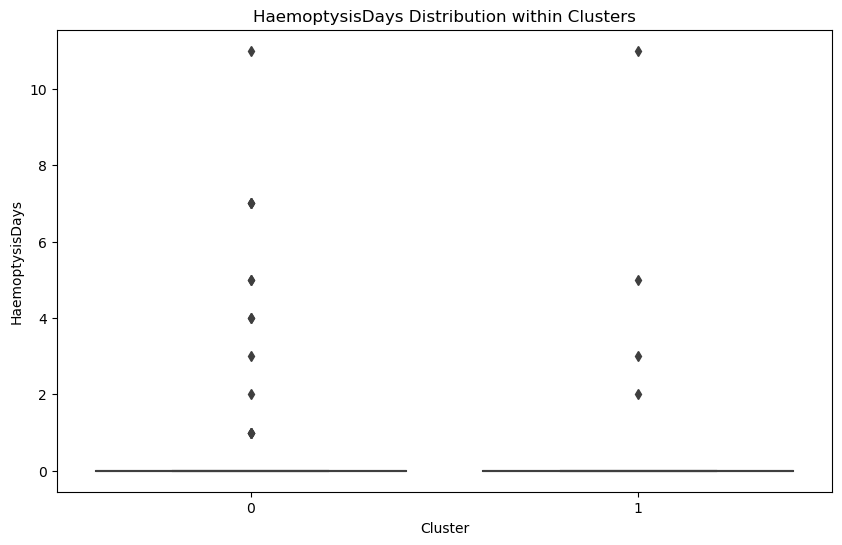

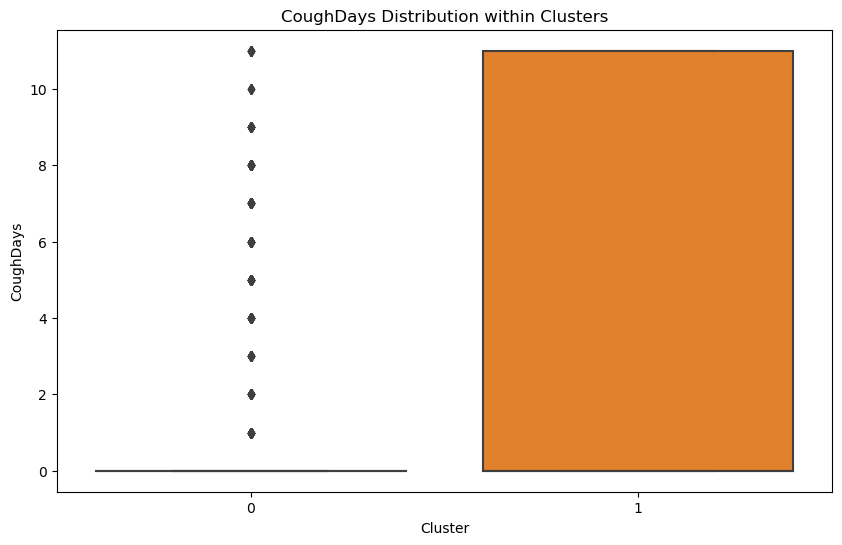

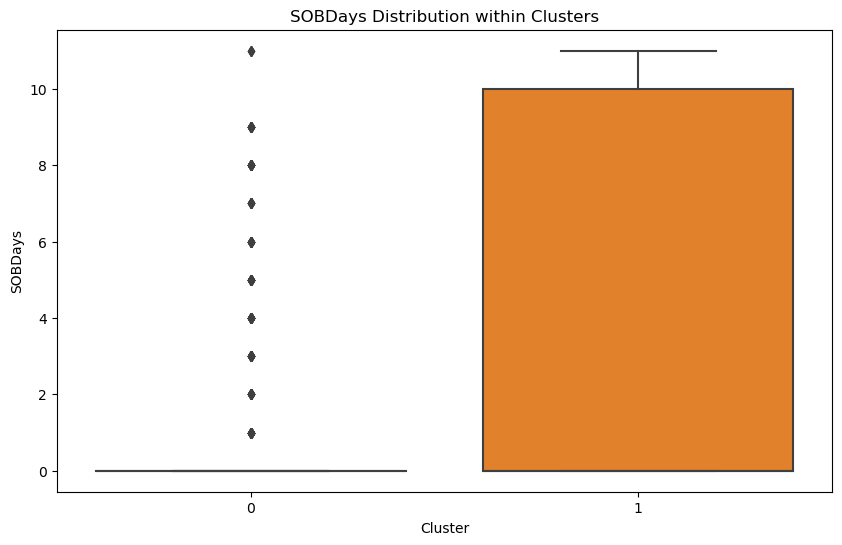

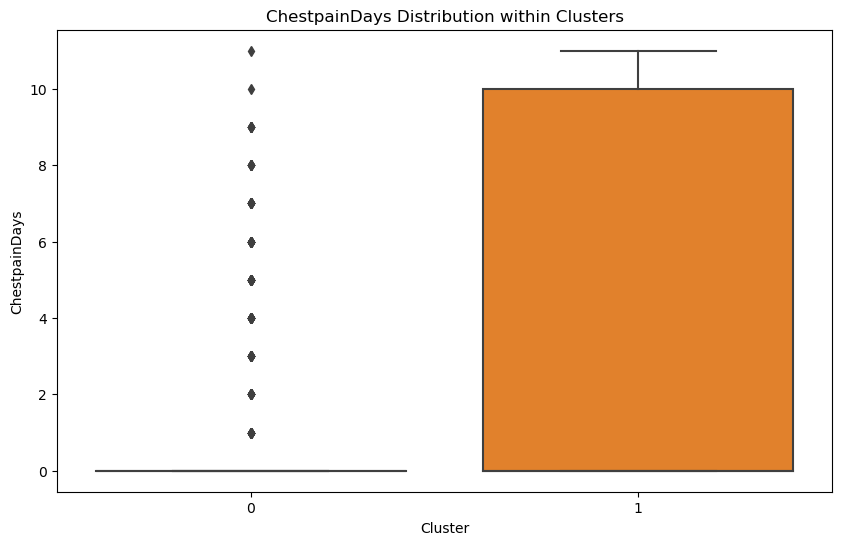

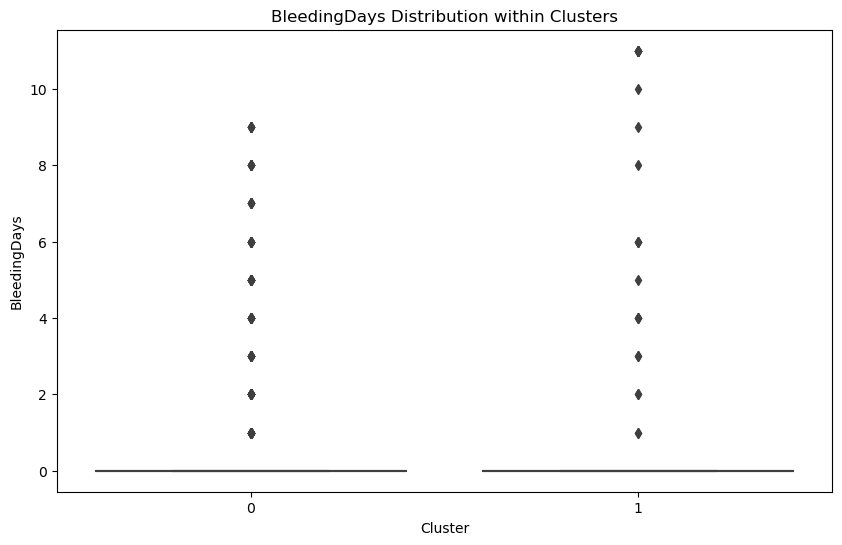

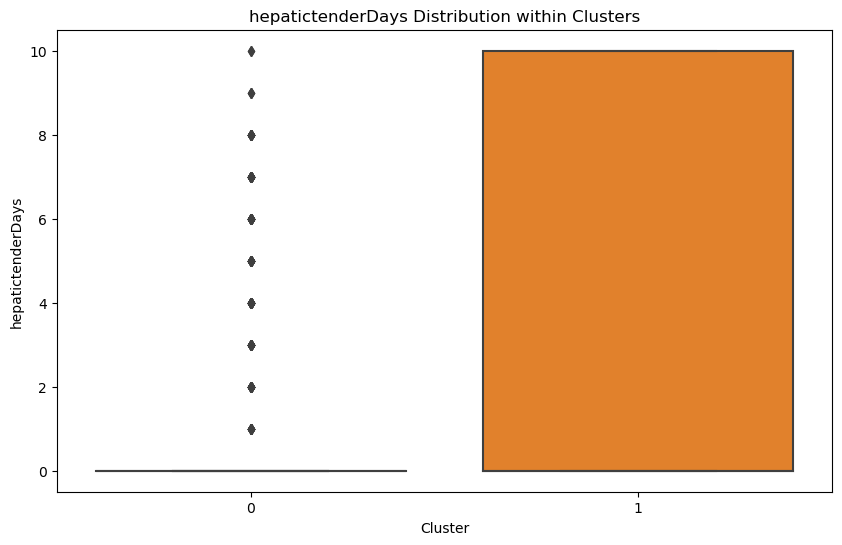

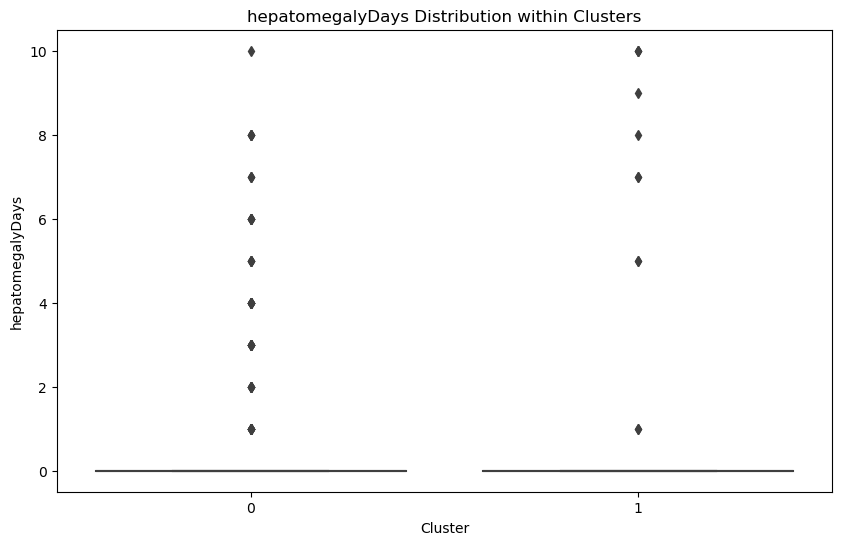

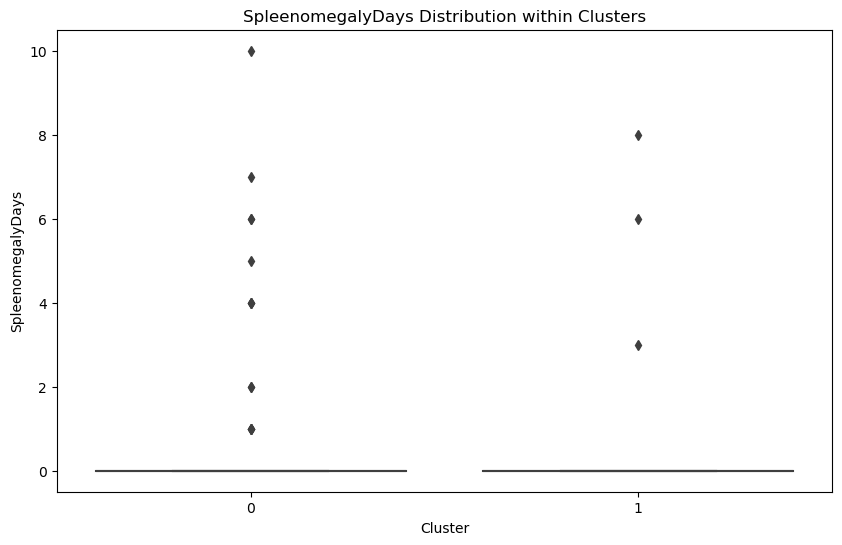

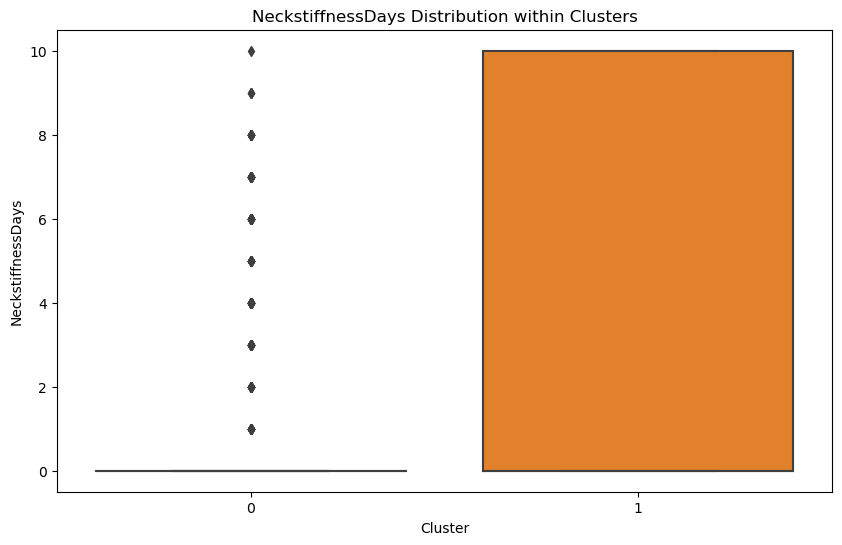

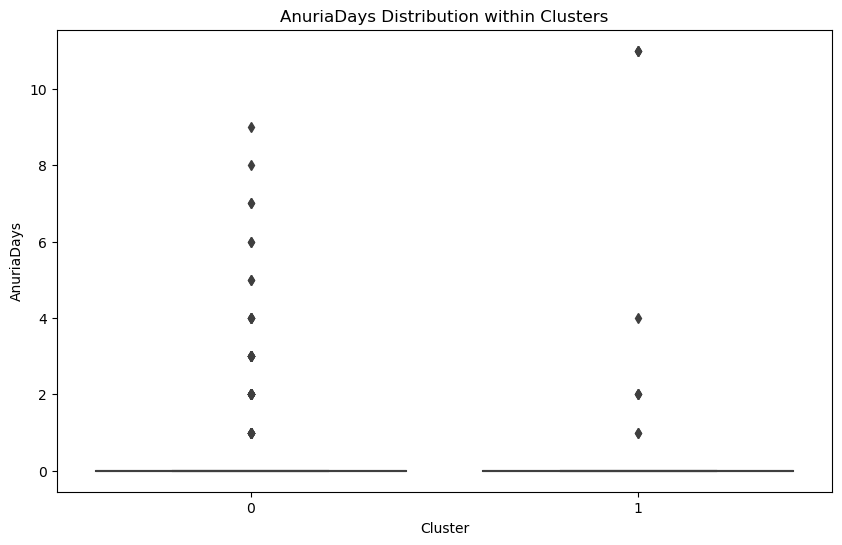

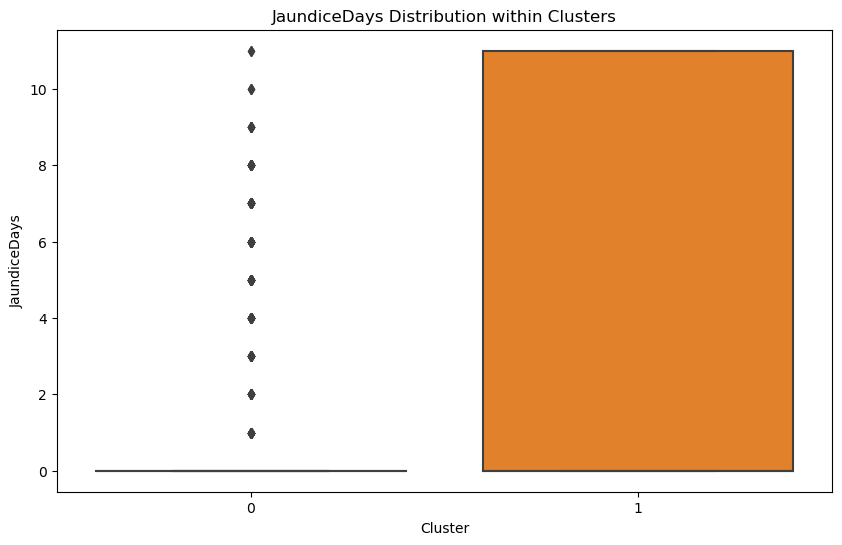

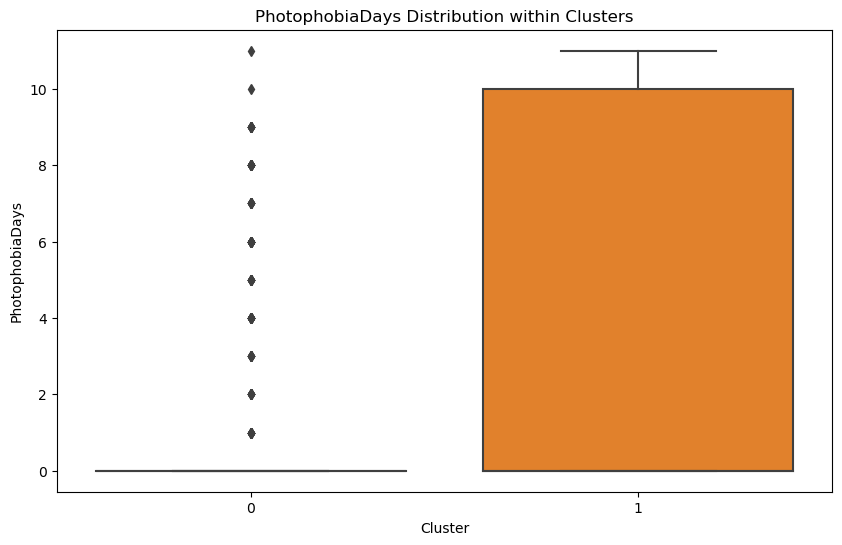

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot
cc = ['Plateletcount', 'HeadacheDays', 'FeverDays', 'ChillsDays', 'RigorsDays', 'MusclepainDays',
      'MustenderDays', 'NauseaDays', 'ConsufDays', 'VomitingDays', 'SkinrashDays', 'MucorashDays',
      'ProstrationDays', 'diarrheaDays', 'OliguriaDays', 'HaemoptysisDays', 'CoughDays', 'SOBDays',
      'ChestpainDays', 'BleedingDays', 'hepatictenderDays', 'hepatomegalyDays', 'SpleenomegalyDays',
      'NeckstiffnessDays', 'AnuriaDays', 'JaundiceDays', 'PhotophobiaDays']

# Loop through each variable and create a boxplot
for variable in cc:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X_with_clusters, x='Cluster', y=variable)
    plt.title(f'{variable} Distribution within Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(variable)
    plt.show()

### According to these above box plots are plotted the two clusters againts the significant varaibles that are identified in descriptive analysis.So we can clearly see for the ones in cluster one,having headache from 0 to 6 days but for the ones in cluster 2 most of them has headache continously more than 7 days. Likewise fever,chills, musclepain symptoms last in the same pattern. But more than 50% of patients in cluster 2 has rigors sysmptoms 7 days but the ones in the cluster 1 has rigors symptoms only for 0 - 4 days.When considering prostration symptoms,50% of patients in cluster 2 has this symptoms around 6 days but the ones in the cluster 1 has this symptoms only for 2 days. These are the particular relationships identified observing clustering analysis. So we can use this relationships to improve the decision of when a patient confirmed as a leptospirosis patient or not and can easily do the further treatments using this identified symptoms relationships   

# Part (b)

## Fitting Classification model

In [238]:
x_train = x_train.drop('Final', axis = 1)
y_train = x_train['Final']


0       2
1       1
2       2
3       2
4       2
       ..
1382    2
1383    2
1384    2
1385    2
1386    1
Name: Final, Length: 1387, dtype: category
Categories (2, int64): [1, 2]

In [179]:
categorical_cols = X.select_dtypes(include='category').columns.tolist()
numeric_cols = X.select_dtypes(include=['Int64', 'float64']).columns.tolist()


0       2
1       1
2       2
3       2
4       2
       ..
1382    2
1383    2
1384    2
1385    2
1386    1
Name: Final, Length: 1387, dtype: category
Categories (2, int64): [1, 2]

In [180]:
# store for rest parts
x_new= x_train.copy()

In [240]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

# Define custom transformers
class oneHot(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoder = OneHotEncoder(sparse_output=False)

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X, y=None):
        onehot_encoded = self.encoder.transform(X[self.columns])
        feature_names = self.encoder.get_feature_names_out(self.columns)
        result_df = pd.DataFrame(onehot_encoded, columns=feature_names, index=X.index)
        return pd.concat([X.drop(columns=self.columns), result_df], axis=1)

class StdScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.select_dtypes(include=np.number).columns
        self.scaler.fit(X[self.columns])
        return self

    def transform(self, X, y=None):
        scaled_data = self.scaler.transform(X[self.columns])
        result_df = pd.DataFrame(scaled_data, columns=self.columns, index=X.index)
        return pd.concat([X.drop(columns=self.columns), result_df], axis=1)

# Assuming x_train and x_test are defined

# Define numerical and categorical columns
numerical_cols = x_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = x_train.select_dtypes(include=['object']).columns.tolist()

# Construct the pipeline
pipe = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StdScaler(), numerical_cols), # Standardize numerical columns
        ('cat', oneHot(columns=categorical_cols), categorical_cols) # One-hot encode categorical columns
    ], remainder='passthrough')) # Pass through any columns not specified
])

# Fit and transform x_train
X_train = pipe.fit_transform(x_train)
feature_names = numerical_cols + list(pipe.named_steps['preprocessor'].named_transformers_['cat'].encoder.get_feature_names_out(categorical_cols))
X_train = pd.DataFrame(X_train, columns=feature_names, index=x_train.index)



In [371]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [243]:
X = x_new.drop('Final', axis = 1)
y = x_new['Final']

categorical_cols = X.select_dtypes(include='category').columns.tolist()
numeric_cols = X.select_dtypes(include=['Int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])


In [245]:
res_encoder = LabelEncoder()
y_encoded = res_encoder.fit_transform(y)


## Logistic Regression model

In [246]:
log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
log_reg_model.fit(X, y_encoded)

# Evaluate the model
accuracy = log_reg_model.score(X, y_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.9416005767844268


## Best model(highest accuracy among other fitted models)

## Decision tree

In [249]:
dec_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dec_tree.fit(X, y_encoded)

# Evaluate the model (optional)
accuracy =dec_tree.score(X, y_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.9942321557317952


# Part (c)

## Obtain the predictions from the model

In [250]:
df2=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Assignment 1\\test.CSV")

In [252]:
# not having "Final" variable
df2.shape

(347, 805)

In [256]:
test_data=df2.copy()


In [258]:
test_data = test_data.drop('ID', axis=1)

In [259]:
test_data.replace(['99', 99], np.nan, inplace=True)

In [260]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
test_data.rename(columns = col_names, inplace=True)


In [261]:
# do the same preprocessing done for x_train


In [262]:
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = test_data[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  test_data[col+'Days'] = df['Days']
  test_data.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [263]:
test_data.shape

(347, 574)

In [264]:
col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
test_data.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = test_data[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  test_data[col+'Days'] = df['Days']
  test_data.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [265]:
test_data.shape

(347, 529)

In [266]:
cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = test_data[cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

test_data['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

test_data.drop(cols, axis = 1, inplace = True)

In [267]:
test_data.shape

(347, 526)

In [268]:
# drop the variables having more than 80% of null values to ensure that dropping the same varibles use "columns_to_drop_1"

test_data = test_data.drop(columns_to_drop_1, axis=1)

In [269]:
test_data.shape

(347, 191)

In [270]:
test_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 191 columns):
 #    Column                                               Dtype  
---   ------                                               -----  
 0    Year                                                 int64  
 1    Month                                                int64  
 2    Hospital                                             int64  
 3    Sample                                               int64  
 4    ICU                                                  float64
 5    OPD                                                  float64
 6    Sex                                                  float64
 7    Age                                                  float64
 8    Ethnicity                                            float64
 9    Income                                               float64
 10   Education                                            float64
 11   TertiaryEducation

In [271]:
median_value=test_data['Income'].median()
test_data['Income'].fillna(median_value, inplace=True)
test_data['Income'].isnull().sum()


0

In [272]:
median_value=test_data['WBCcount'].median()
test_data['WBCcount'].fillna(median_value, inplace=True)
test_data['WBCcount'].isnull().sum()


0

In [273]:
median_value=test_data['Age'].mean()
test_data['Age'].fillna(median_value, inplace=True)
test_data['Age'].isnull().sum()


0

In [275]:
col_categorical = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1']

test_data[col_categorical] = test_data[col_categorical].astype('category')

In [276]:
x_test= test_data.copy()

x_test= x_test.fillna(x_test.mode().iloc[0])
missingval_col = x_test.columns[x_test.isna().any()]

print(missingval_col)

Index([], dtype='object')


In [277]:
pred_test = log_reg_model.predict(x_test)
print(pred_test)

[0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 0 0]


In [278]:
# to represent the category types of "Final" variable
pred_test = pred_test+1
print(pred_test)

[1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2
 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2
 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1 2 1
 2 2 2 1 2 2 2 2 2 1 1 1 1 1]


In [281]:
predictions_df2=pd.DataFrame({
    'ID': df2['ID'],
    'Final':pred_test
})

In [282]:
predictions_df2.to_csv('s15642_sample_submission.csv', index=False)

## Improve model accuracy - use SMOTE 

In [352]:
X.shape

(1387, 191)

In [353]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_n, y_n =smote.fit_resample(X, y)
label_encoder = LabelEncoder()
y_en = label_encoder.fit_transform(y_n)

In [355]:
# fit the logistic regression model
log_reg_model.fit(X_n, y_en)

# Evaluate the model
accuracy = log_reg_model.score(X_n, y_en)
print("Accuracy:", accuracy)

Accuracy: 0.9552801724137931


In [357]:
pred_test1 = log_reg_model.predict(x_test)
print(pred_test1)

[0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 0 0]


In [358]:
pred_test1 = pred_test1+1
print(pred_test1)

[1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2
 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2
 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1 2 1
 2 2 2 1 2 2 2 2 2 1 1 1 1 1]


In [359]:
predictions_df2=pd.DataFrame({
    'ID': df2['ID'],
    'Final':pred_test1
})
predictions_df2.to_csv('s15642_sample_submission1.csv', index=False)

In [361]:
# fit ridge model
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000))
])

ridge_model.fit(X_n, y_en)

# Evaluate the model
accuracy = ridge_model.score(X_n, y_en)
print("Accuracy:", accuracy)

Accuracy: 0.9552801724137931


In [362]:
pred_test2 = ridge_model.predict(x_test)
print(pred_test2)

[0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1
 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 0 0]


In [363]:
pred_test2 = pred_test2+1
print(pred_test2)

[1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2
 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2
 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1 2 1
 2 2 2 1 2 2 2 2 2 1 1 1 1 1]


In [364]:
predictions_df2=pd.DataFrame({
    'ID': df2['ID'],
    'Final':pred_test2
})
predictions_df2.to_csv('s15642_sample_submission2.csv', index=False)

In [377]:
# decision tree

# Create a pipeline with the Decision Tree classifier
de_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
de_tree.fit(X_n, y_en)

# Evaluate the model (optional)
accuracy =de_tree.score(X_n, y_en)
print("Accuracy:", accuracy)

Accuracy: 0.9956896551724138


In [378]:
pred_test3 = de_tree.predict(x_test)
print(pred_test)

[1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2
 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2
 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2
 2 1 2 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 2 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1 2 1
 2 2 2 1 2 2 2 2 2 1 1 1 1 1]


In [379]:
pred_test3 = pred_test3+1
print(pred_test3)

[1 2 2 1 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1
 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 2 1 1 2
 2 1 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1
 2 1 2 2 1 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 1 1 2 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2
 1 2 2 1 2 2 2 1 2 1 2 2 1 2]


In [380]:
predictions_df2=pd.DataFrame({
    'ID': df2['ID'],
    'Final':pred_test3
})
predictions_df2.to_csv('s15642_sample_submission4.csv', index=False)

In [381]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the model
rf_pipeline.fit(X_n, y_en)

# Evaluate the model
rf_accuracy = rf_pipeline.score(X_n, y_en)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9956896551724138


In [383]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Fit the model
rf_pipeline.fit(X_n, y_en)

# Evaluate the model
rf_accuracy = rf_pipeline.score(X_n, y_en)
print("Random Forest Accuracy with class weights:", rf_accuracy)

Random Forest Accuracy with class weights: 0.9956896551724138


### use feature selection

In [415]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import ExtraTreesClassifier

In [416]:
rfe=RFECV(estimator=ExtraTreesClassifier(),min_features_to_select=1,cv=5)

In [417]:
model=rfe.fit(X,y)

In [397]:
X.columns[(model.get_support())].shape

(73,)

In [398]:
X.columns[(model.get_support())]

Index(['Year', 'Month', 'Hospital', 'Sex', 'Age', 'Income', 'Education',
       'Pasttreatments', 'Pastantibiotics', 'Chronicillness',
       'Possibleexposure', 'Usualdrinkingwatersource',
       'Usualbathingwatersource', 'PRad', 'SBPadd', 'DBPadd', 'Pulserate6',
       'Pulserate7', 'DBP4', 'SBP6', 'DBP6', 'WBCcount', 'Ncount', 'N',
       'Lcount', 'L', 'Plateletcount', 'PCV', 'RBC', 'CRP', 'Na', 'AST', 'ALT',
       'S.creatinine', 'B.urea', 'WBC_first_day', 'WBCcount6', 'Ncount4',
       'Ncount6', 'N4', 'N5', 'N6', 'L4', 'L5', 'L6', 'Platelet4', 'Platelet5',
       'Platelet6', 'PCV6', 'WPqPCRDiagnosis', 'UrineqPCRDiagnosis',
       'CultureqPCRDia', 'SerumqPCRDiagnosis', 'Isolate',
       'Acu_L.interrogansserovarBratislavastr.JezBratislava',
       'Acu_L.interrogansserovarCanicolastr.Ruebush', 'HeadacheDays',
       'FeverDays', 'ChillsDays', 'RigorsDays', 'MusclepainDays',
       'MustenderDays', 'NauseaDays', 'VomitingDays', 'ConsufDays',
       'ProstrationDays', 'diarrhea

In [399]:
selCols= ['Year', 'Month', 'Hospital', 'Sex', 'Age', 'Income', 'Education',
       'Pasttreatments', 'Pastantibiotics', 'Chronicillness',
       'Possibleexposure', 'Usualdrinkingwatersource',
       'Usualbathingwatersource', 'PRad', 'SBPadd', 'DBPadd', 'Pulserate6',
       'Pulserate7', 'DBP4', 'SBP6', 'DBP6', 'WBCcount', 'Ncount', 'N',
       'Lcount', 'L', 'Plateletcount', 'PCV', 'RBC', 'CRP', 'Na', 'AST', 'ALT',
       'S.creatinine', 'B.urea', 'WBC_first_day', 'WBCcount6', 'Ncount4',
       'Ncount6', 'N4', 'N5', 'N6', 'L4', 'L5', 'L6', 'Platelet4', 'Platelet5',
       'Platelet6', 'PCV6', 'WPqPCRDiagnosis', 'UrineqPCRDiagnosis',
       'CultureqPCRDia', 'SerumqPCRDiagnosis', 'Isolate',
       'Acu_L.interrogansserovarBratislavastr.JezBratislava',
       'Acu_L.interrogansserovarCanicolastr.Ruebush', 'HeadacheDays',
       'FeverDays', 'ChillsDays', 'RigorsDays', 'MusclepainDays',
       'MustenderDays', 'NauseaDays', 'VomitingDays', 'ConsufDays',
       'ProstrationDays', 'diarrheaDays', 'OliguriaDays', 'JaundiceDays',
       'ConfusionDays', 'CoughDays', 'hepatictenderDays', 'NeckstiffnessDays']

In [401]:
X_new=X[selCols].copy()

In [402]:
X_new.shape

(1387, 73)

In [404]:
X_test_new.shape

(347, 73)

In [409]:
c_cols = X_new.select_dtypes(include='category').columns.tolist()
n_cols = X_new.select_dtypes(include=['Int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), c_cols),
        ('num', StandardScaler(), n_cols)
    ])

In [407]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_nn, y_nn =smote.fit_resample(X_new, y)
label_encoder = LabelEncoder()
y_enn = label_encoder.fit_transform(y_nn)

In [410]:
de_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
de_tree.fit(X_nn, y_enn)

# Evaluate the model (optional)
accuracy =de_tree.score(X_nn, y_enn)
print("Accuracy:", accuracy)

Accuracy: 0.9956896551724138


In [411]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Fit the model
rf_pipeline.fit(X_nn, y_enn)

# Evaluate the model
rf_accuracy = rf_pipeline.score(X_nn, y_enn)
print("Random Forest Accuracy with class weights:", rf_accuracy)

Random Forest Accuracy with class weights: 0.9956896551724138


In [412]:
pred_test4 = de_tree.predict(X_test_new)
print(pred_test4)

[0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 1 0 1 1 0 1]


In [413]:
pred_test4 = pred_test4+1
print(pred_test4)

[1 2 2 1 1 2 2 2 2 2 2 2 1 2 2 2 2 1 1 1 1 1 2 2 2 1 2 2 2 2 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 2 1 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 1 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2
 1 1 2 2 1 1 1 2 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 1
 2 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 1 2 1 1 2 2 1 2 1 1 1 2 2 2 1 2 1 1 2 2 1 1 2 2 2 1 2 1
 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2
 1 2 2 1 1 2 1 2 2 1 2 2 1 2]
